In [4]:
%matplotlib inline
from rain import *
from common import *
from event import *

In [5]:
path = './input/CHARLOTTE/'

rg = Rain(path=path, name='Charlotte_CRN_gage_{YEAR}.csv', year=range(1993, 2016), ngages=71, freq='15min')
rg.ll_file = 'Charlotte_CRN_lat_lon.csv'
rg.get_ll(cols=['lat','lon'])

rg.save_path = './output/Charlotte/'

## Rain Rate over Period of Record

This red in this plot shows rain rate (mm/hr) at each 15min timestep over the period of record and the blue shows the daily average at each time. 

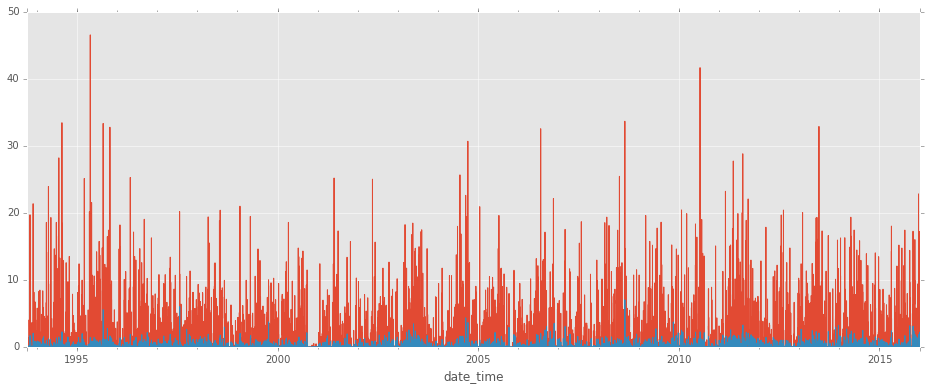

In [14]:
rg.rate.mean(axis=1).plot(figsize=(16,6))
pd.rolling_mean(rg.rate.mean(axis=1), window=4*24, freq='15min').plot()
plt.show()

Seasonal and diurnal patterns of rain rate.

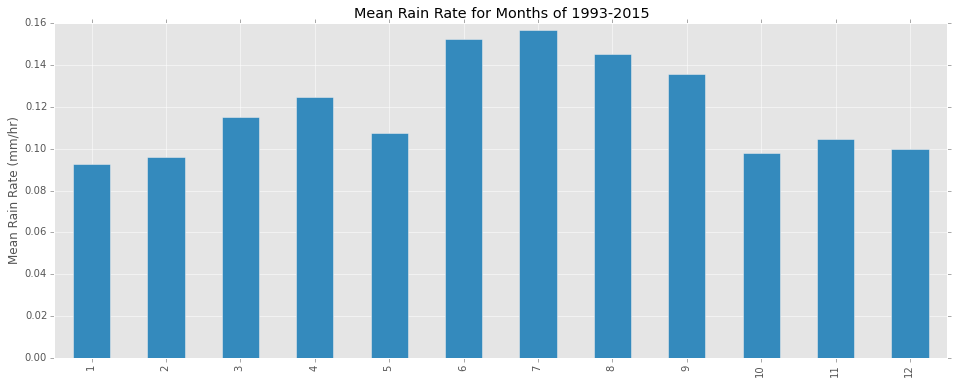

In [7]:
rg.plot_rate(interval='seasonal')

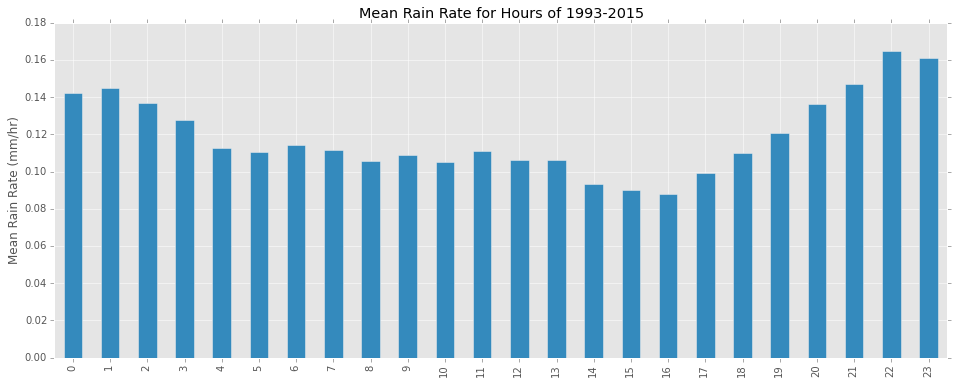

In [8]:
rg.plot_rate(interval='diurnal')

## Probability of wet days occuring

Plots of the mean probability that a day will be wet using a variety of thresholds. In this instance we take the mean probability for each month.

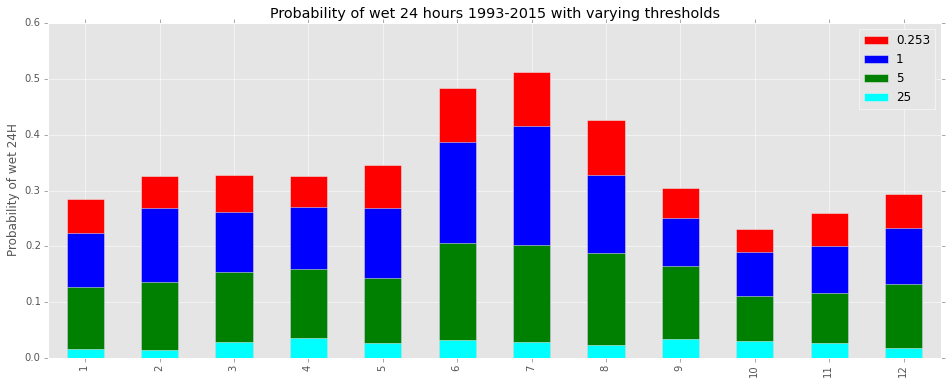

In [11]:
for mm, c in zip([.253, 1, 5, 25], ['red','blue','green','cyan']):
    rg.thresh = mm * rg.per_hour
    rg.plot_prob_wet(interval='seasonal', time_step='24H', base=12, color=c, save=False)
plt.legend([.253, 1, 5, 25])
title = 'Probability of wet 24 hours 1993-2015 with varying thresholds'
plt.title(title)
plt.savefig(rg.save_path + title + '.png')

We can also make plots of the probability that different four hour intervals within the average day will be wet:

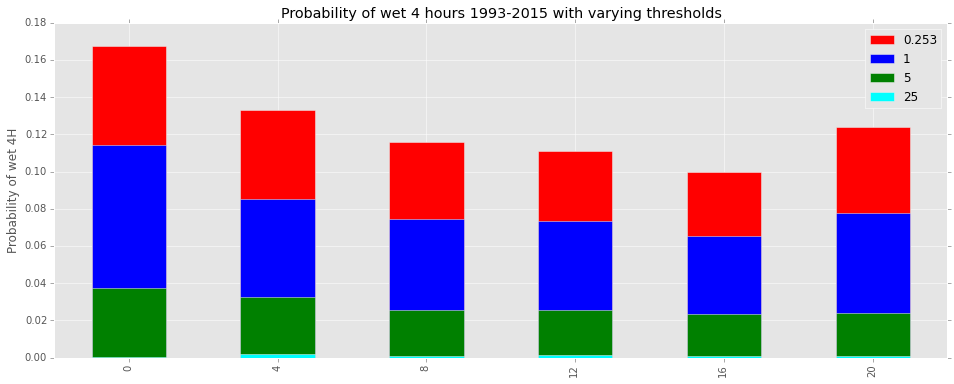

In [12]:
for mm, c in zip([.253, 1, 5, 25], ['red','blue','green','cyan']):
    rg.thresh = mm * rg.per_hour
    rg.plot_prob_wet(interval='diurnal', time_step='4H', color=c, save=False)
plt.legend([.253, 1, 5, 25])
title = 'Probability of wet 4 hours 1993-2015 with varying thresholds'
plt.title(title)
plt.savefig(rg.save_path + title + '.png')

## Distribution of rain rates for wet days

Boxplots to highlight the distribution of rainfall across months we'll use a threshold of 1mm for these:

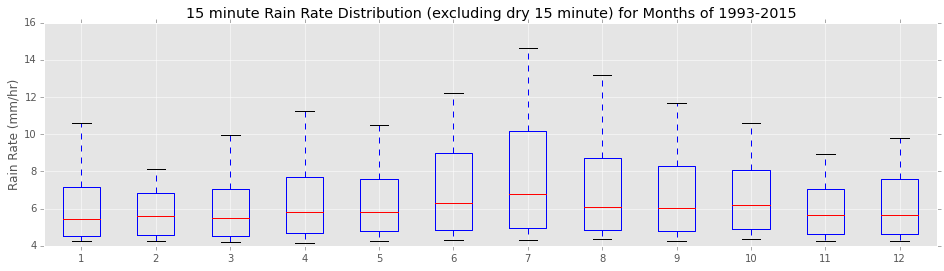

In [9]:
rg.thresh = rg.per_hour*1
rg.plot_boxplots(interval='seasonal')

Across hours:

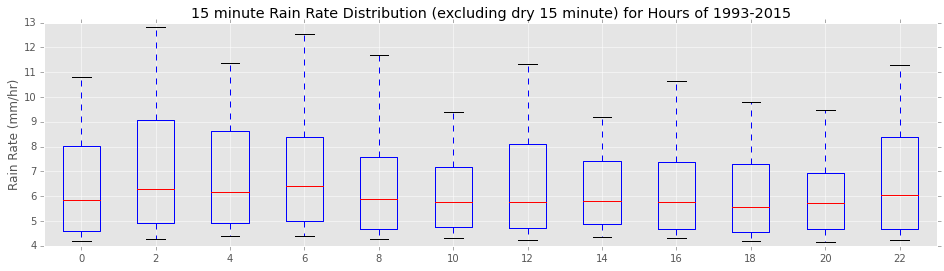

In [10]:
rg.plot_boxplots(interval='diurnal')

That was an average of all the months at each hour, but say we are just interested in the rainiest month: July

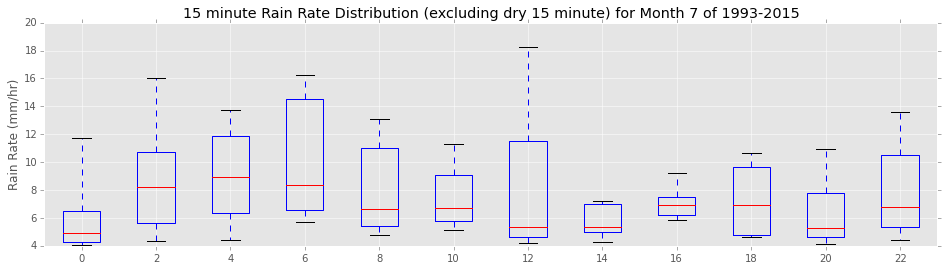

In [11]:
rg.plot_boxplots(interval='diurnal', m=7)

## Mapping Rainfall

Once we are satisfied with the temporal components of the data, we are ready to try mapping the rain in space. As a first pass, we can just plot the mean rain rate at each location. 

#### Rain rate

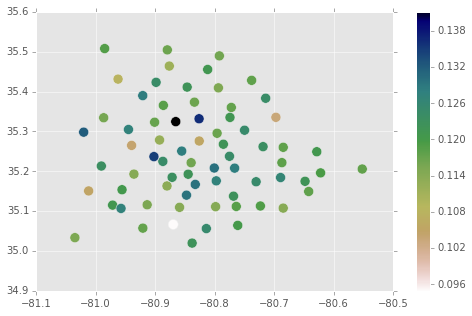

In [31]:
rg.plot_rate(gage=rg.list_gages(), bar=False, map=True, hide_title=True)

#### Probability of wet 15 min

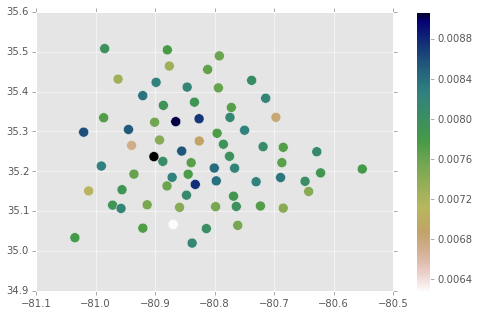

In [14]:
rg.thresh = 1*rg.per_hour
rg.plot_prob_wet(gage=rg.list_gages(), bar=False, map=True,  hide_title=True)

We can use lowess to find the time of peak rainfall within the average day.

#### Time of peak rainfall

In [15]:
lm = rg.get_max_lowess(example_plot=False)

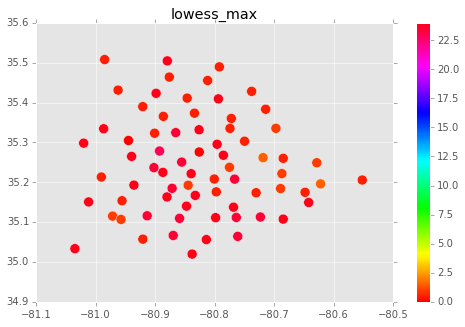

In [16]:
e = Event(rg.ll.join(lm))
title = 'Map of Time of Peak Rainfall using lowess (f=.25) for 15min of {y}'
e.map_rain(latlon=True, cmap='hsv', sharec=(0,24), save_path=rg.save_path, 
           title=title.format(y=rg.year), hide_title=True)

## Particular Events

In this case we are looking for the the rainiest 4 days of the entire dataset. 

In [37]:
rg.get_rainiest(4)

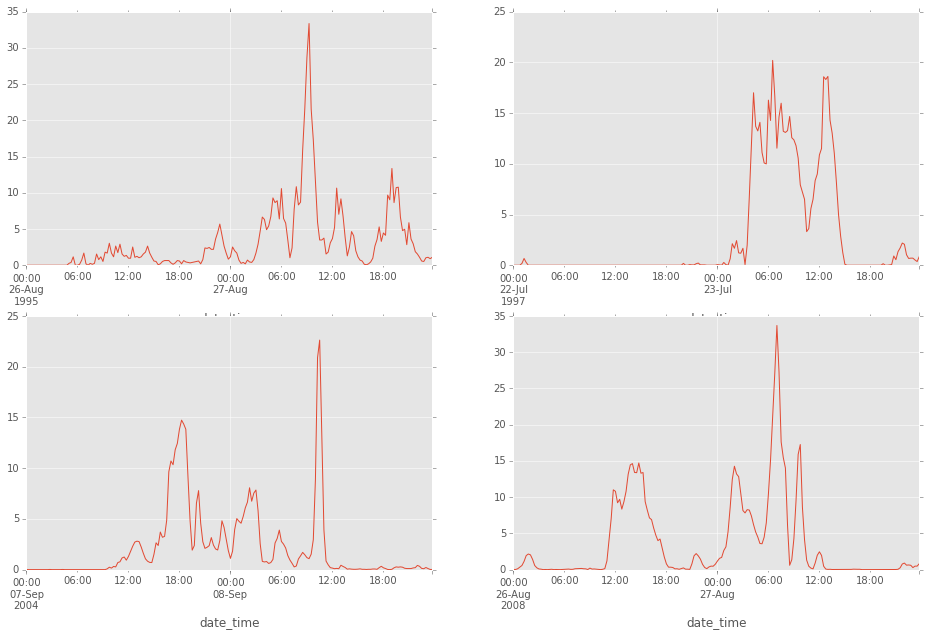

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
rg.rate['1995-08-26':'1995-08-27'].mean(axis=1).plot(ax=axes[0,0])
rg.rate['1997-07-22':'1997-07-23'].mean(axis=1).plot(ax=axes[0,1])
rg.rate['2004-09-07':'2004-09-08'].mean(axis=1).plot(ax=axes[1,0])
rg.rate['2008-08-26':'2008-08-27'].mean(axis=1).plot(ax=axes[1,1])
plt.show()

The 1997 storm is a nice storm so we will check that one out first.

In [27]:
rg.get_storm('1997-07-23 3:00', storm_end='1997-07-23 15:00')
storm = Event(rg.storm)

Be careful computing semi-variograms on this storm, lots of non-positive readings



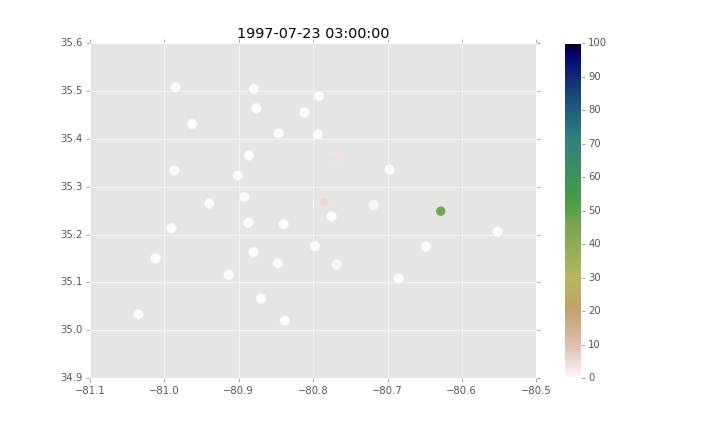
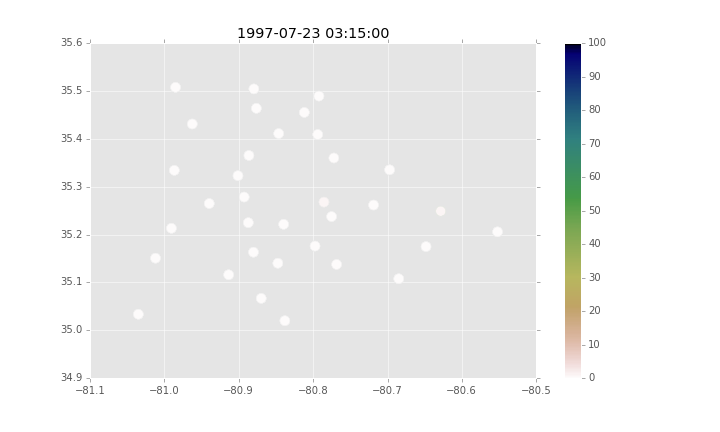
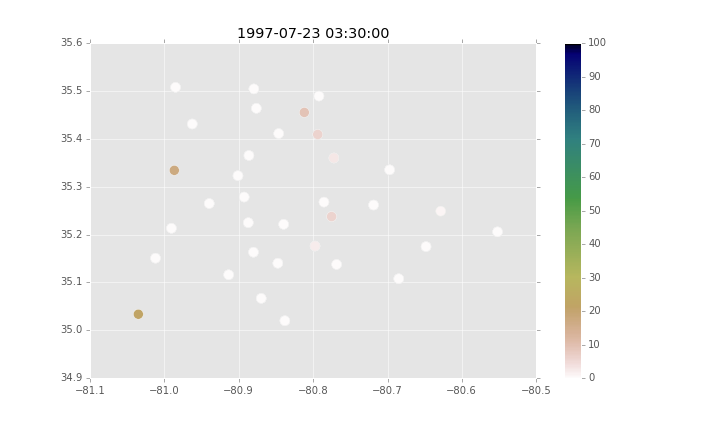
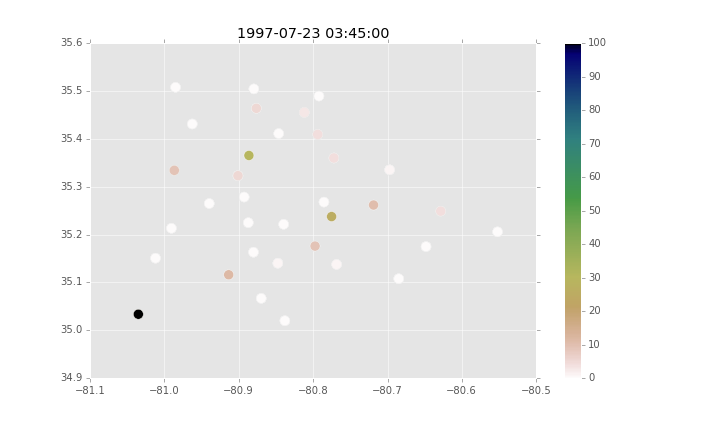
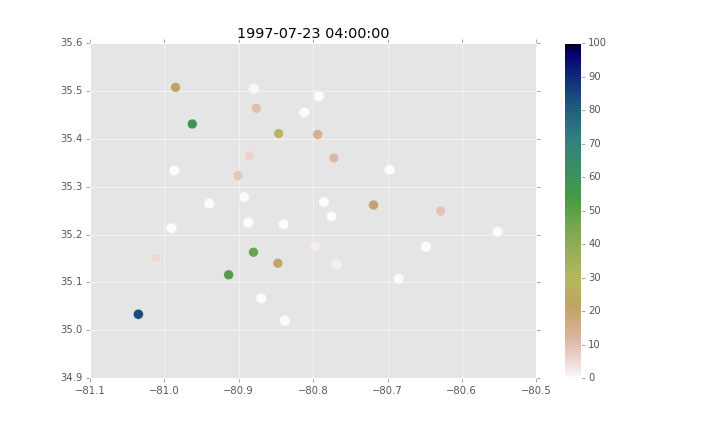
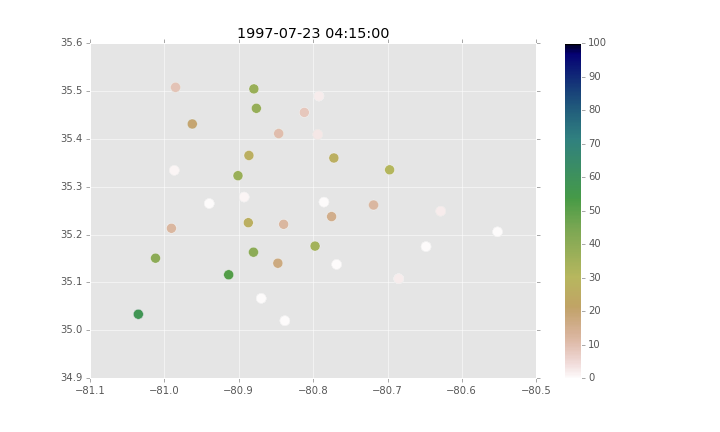
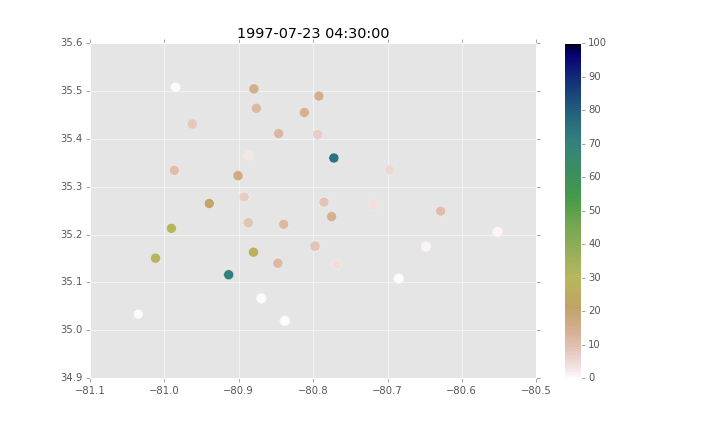
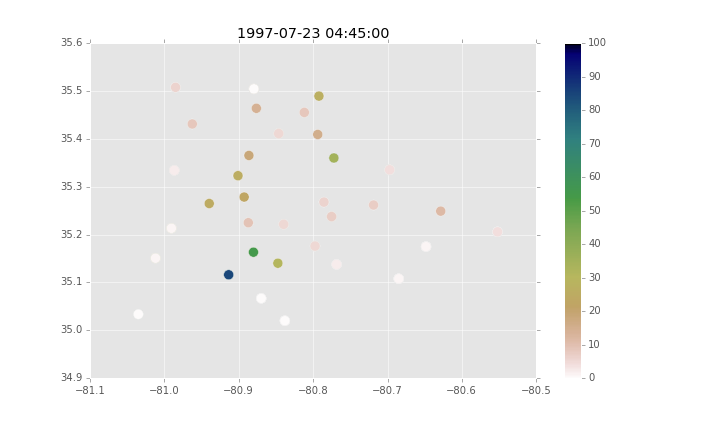
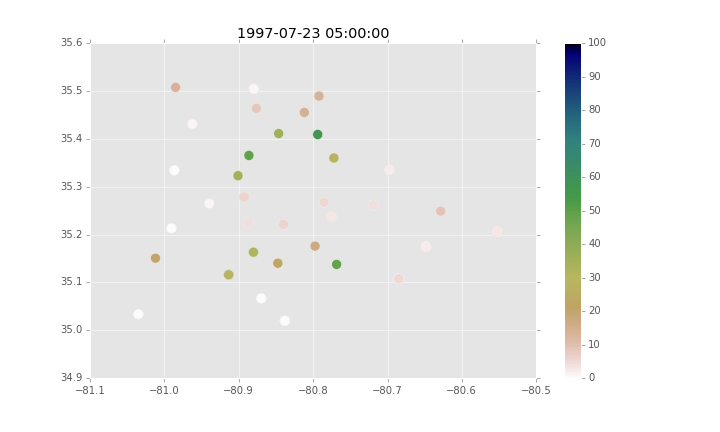
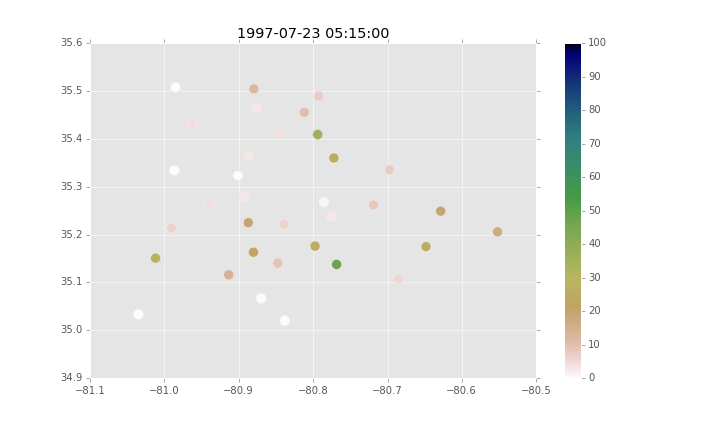
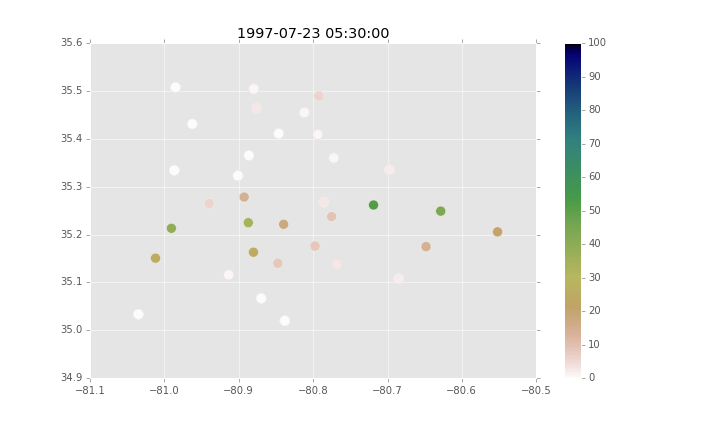
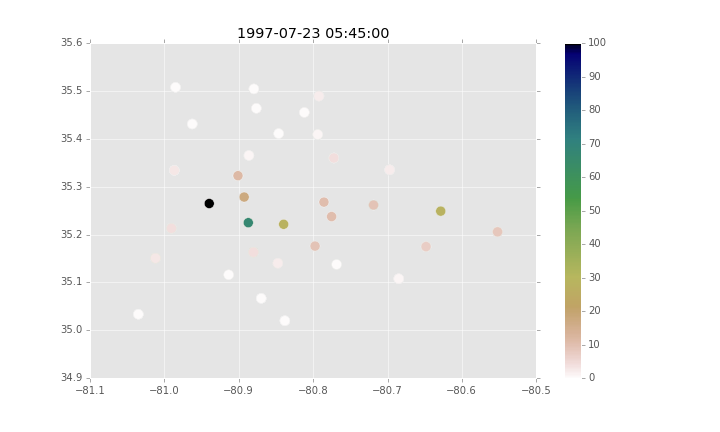
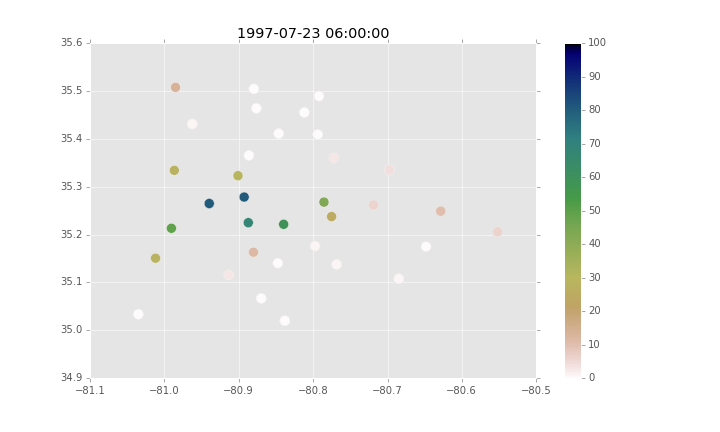
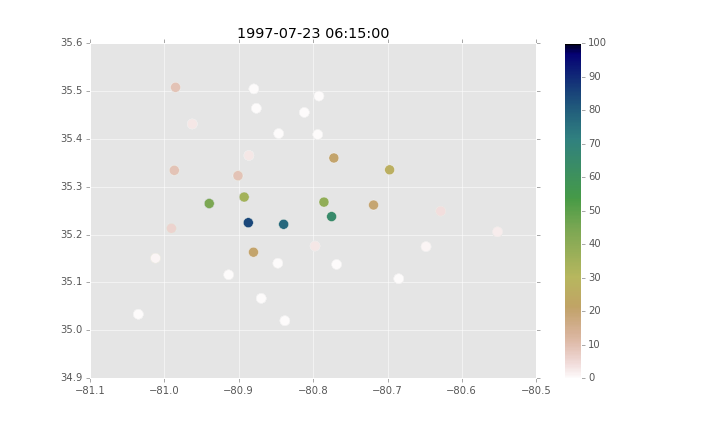
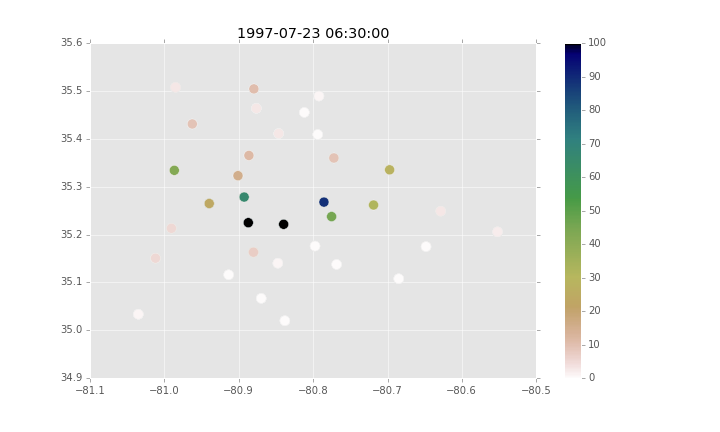
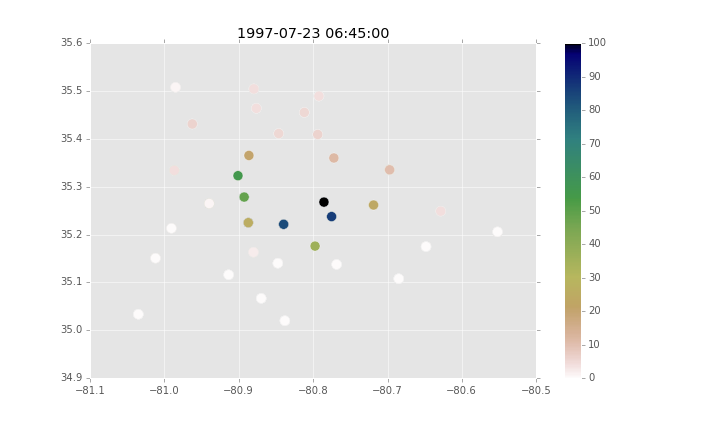
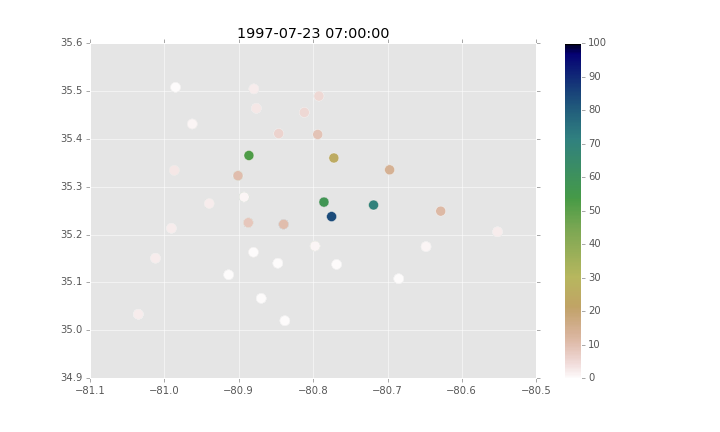
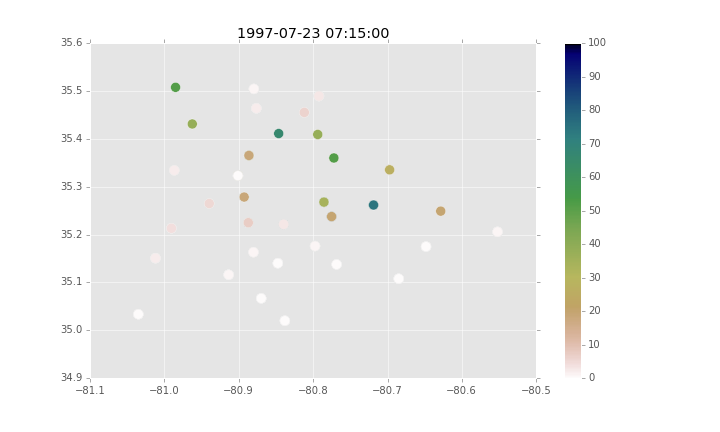
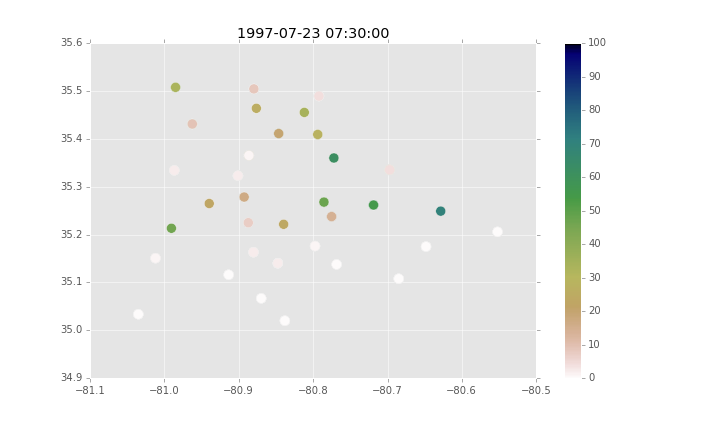
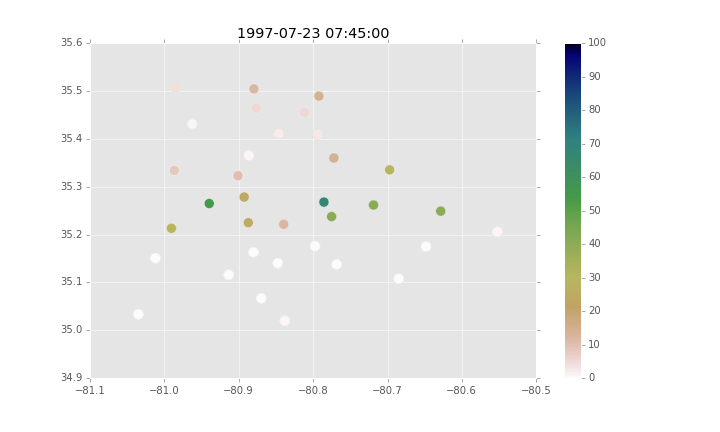
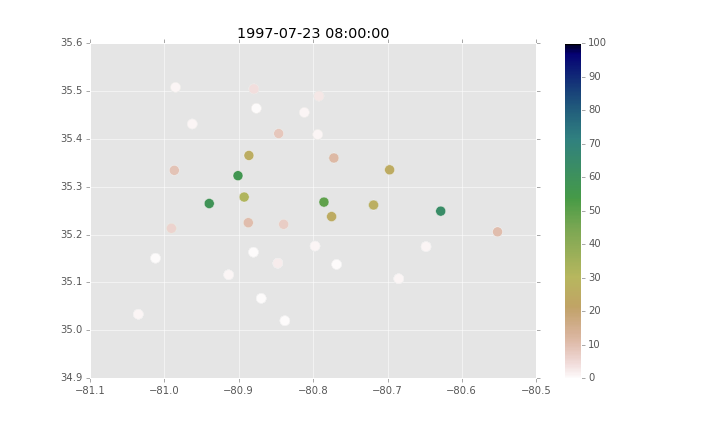
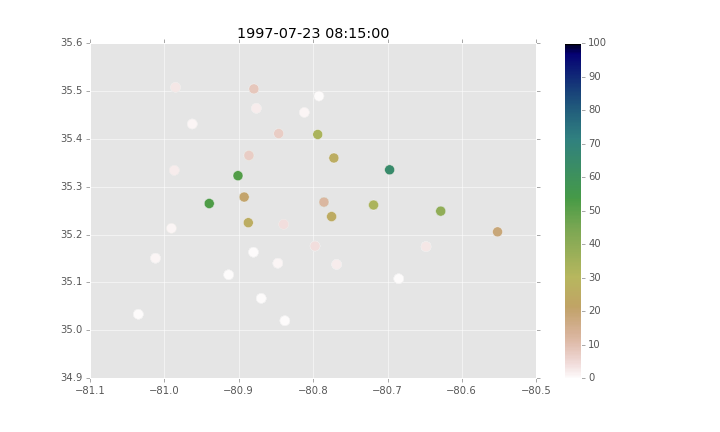
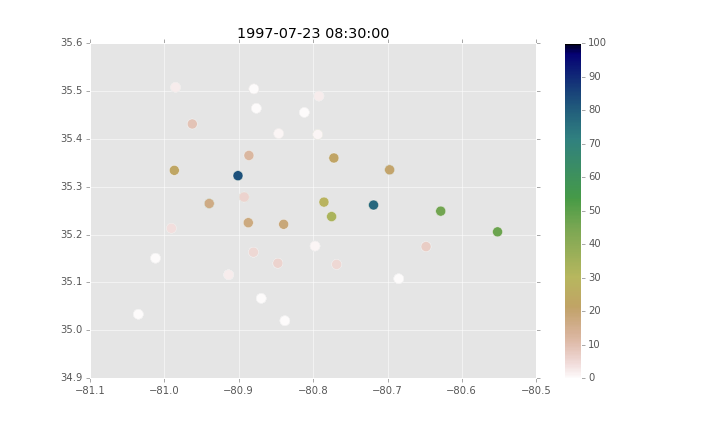
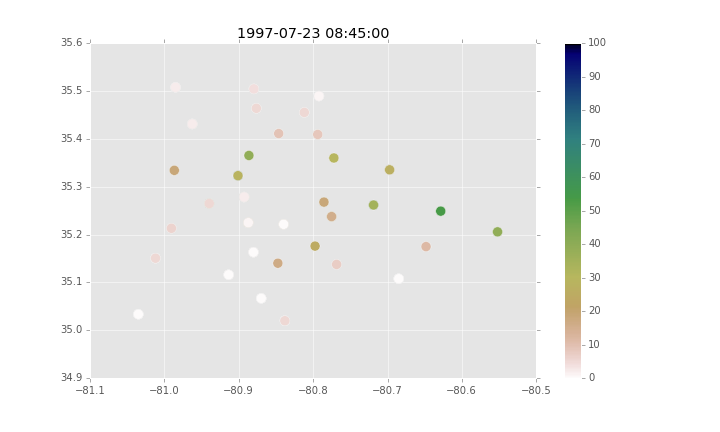
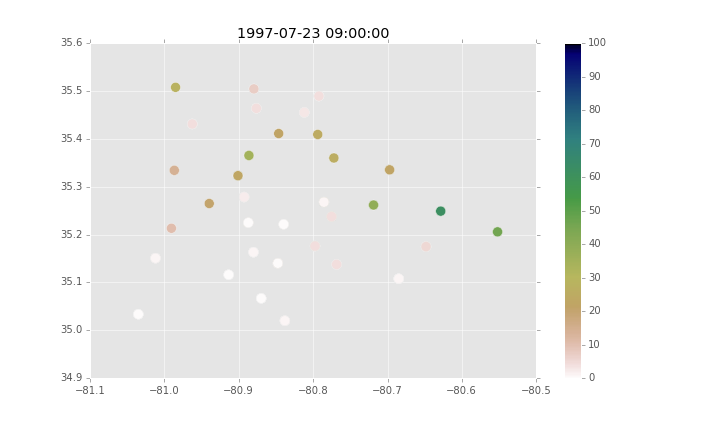
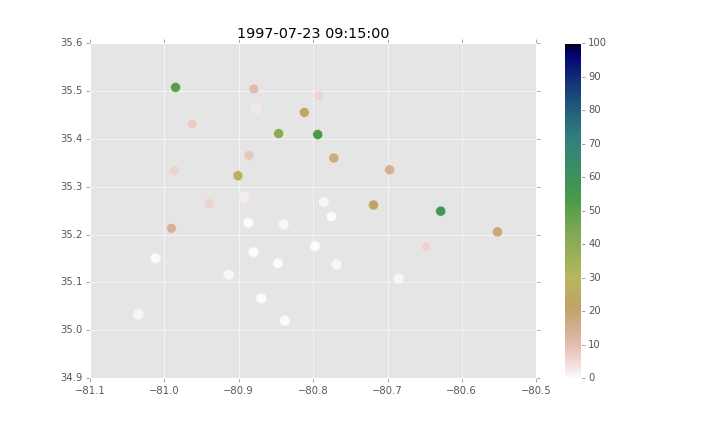
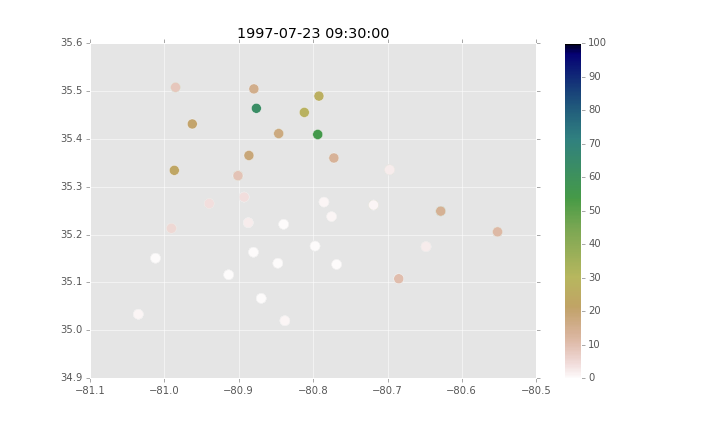
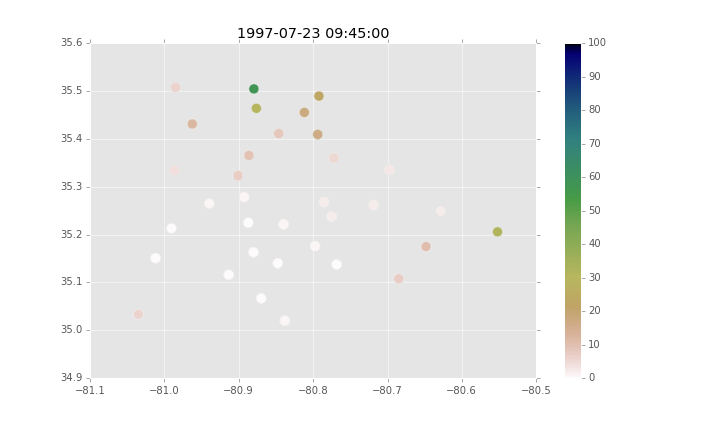
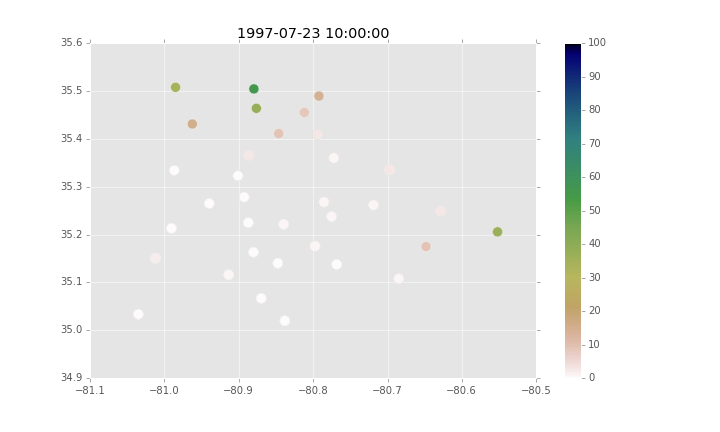
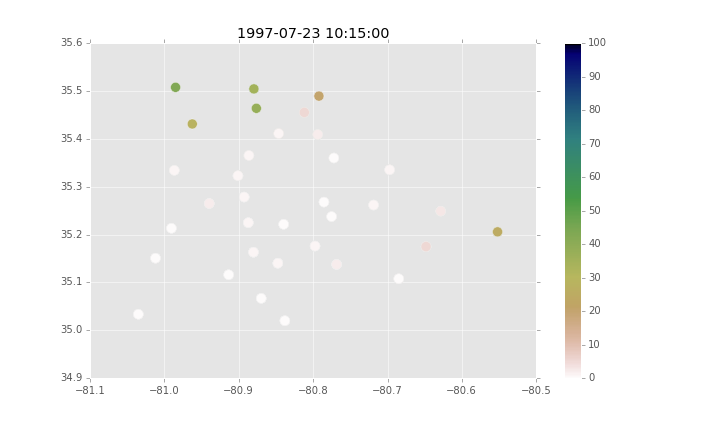
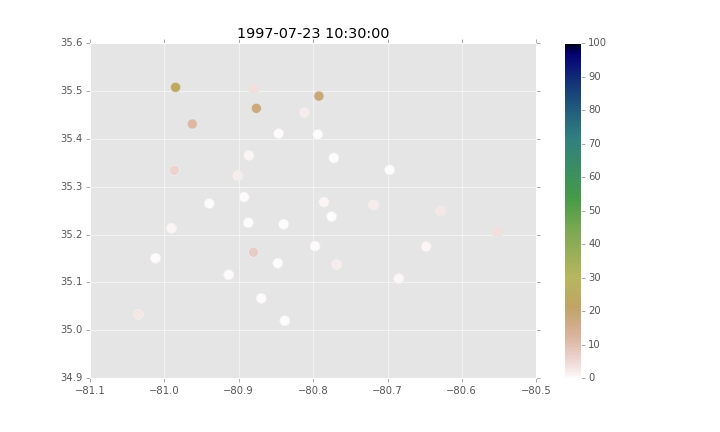
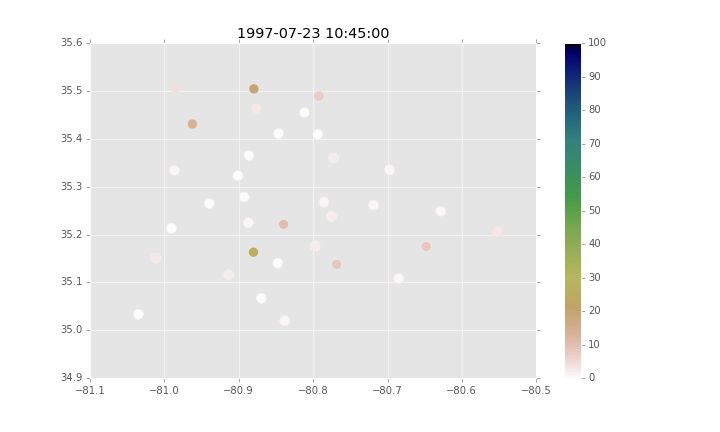
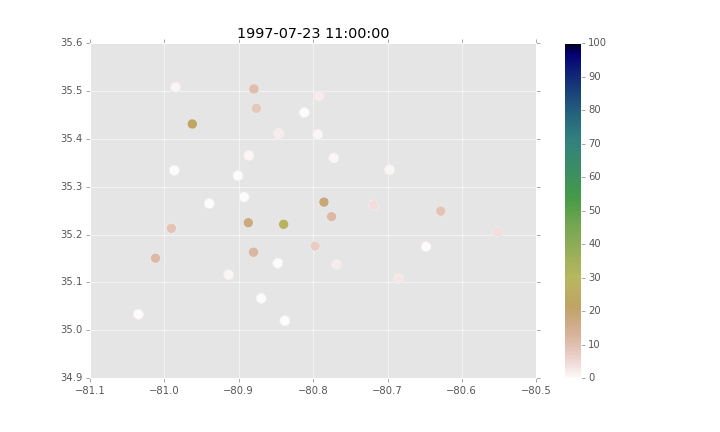
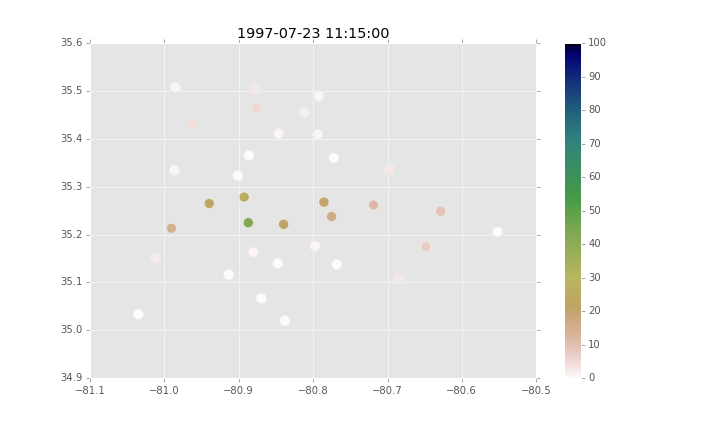
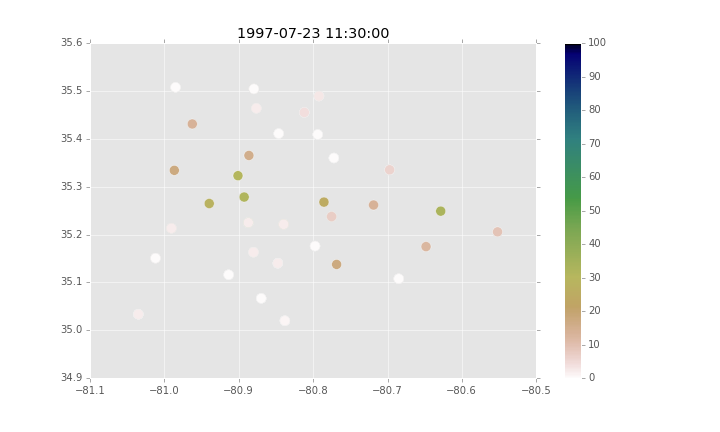
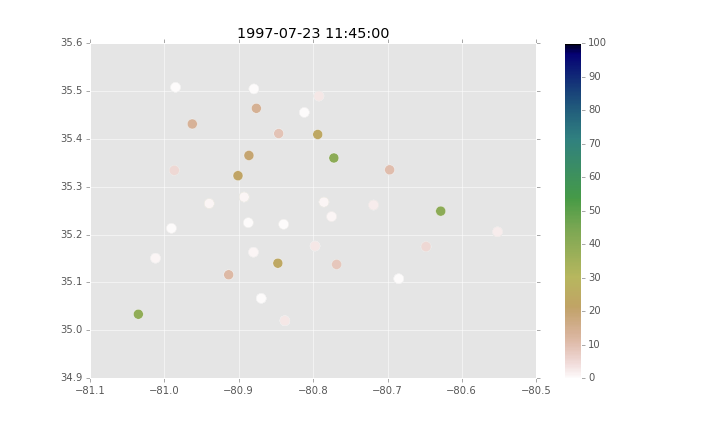
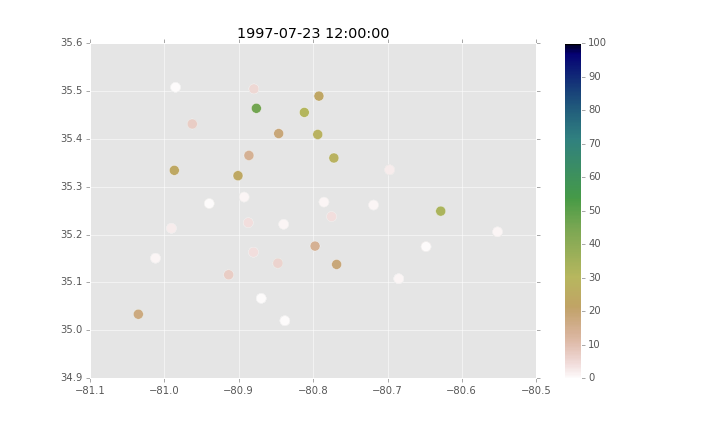
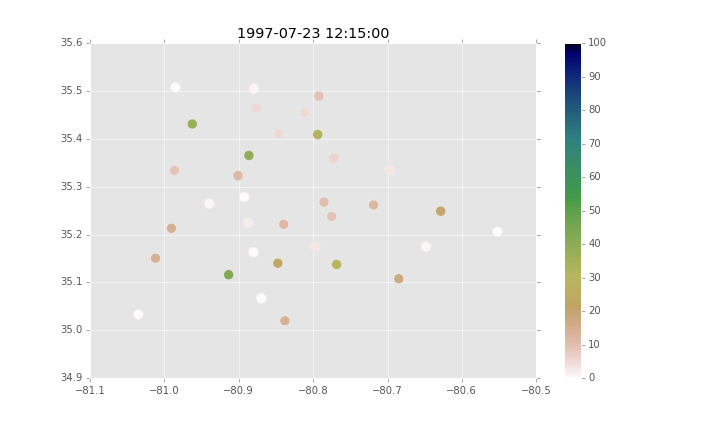
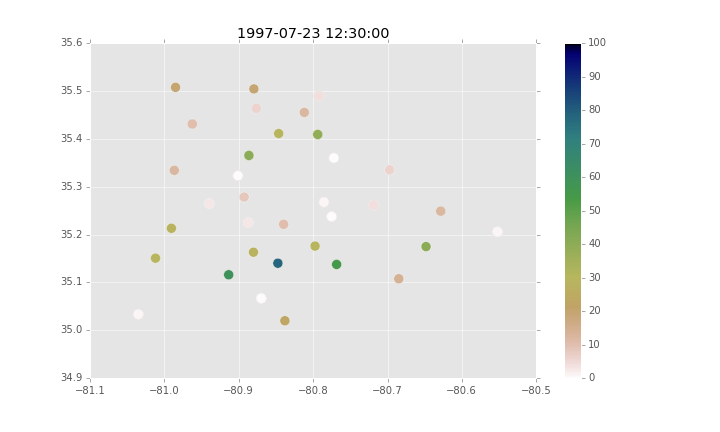
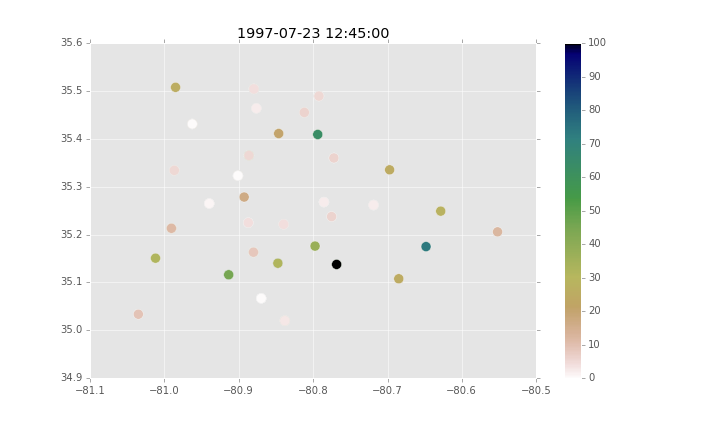
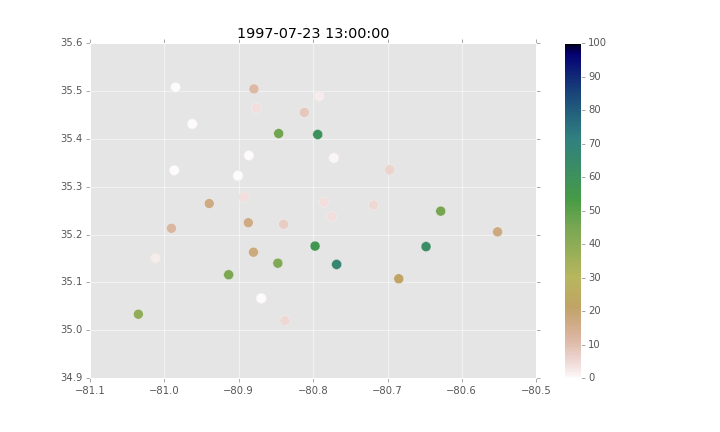
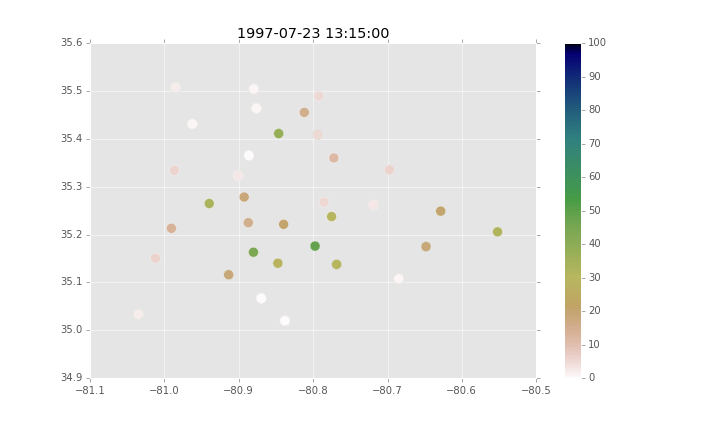
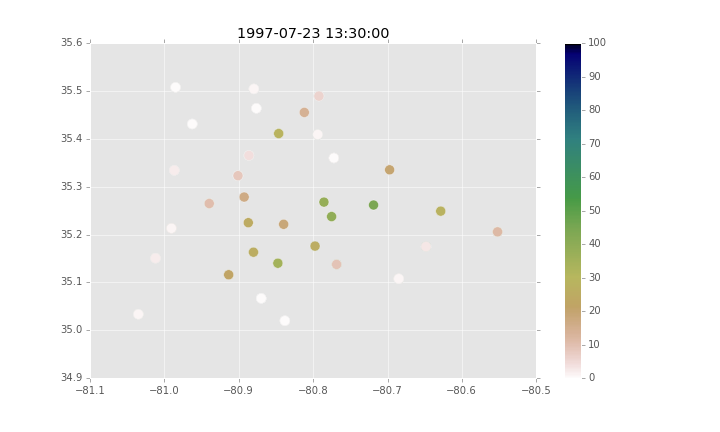
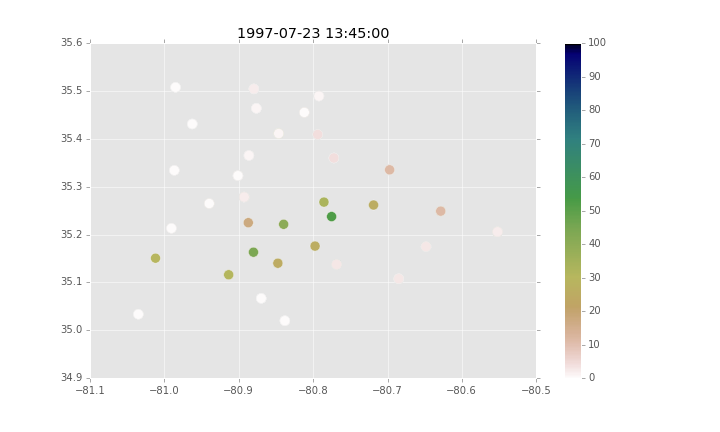
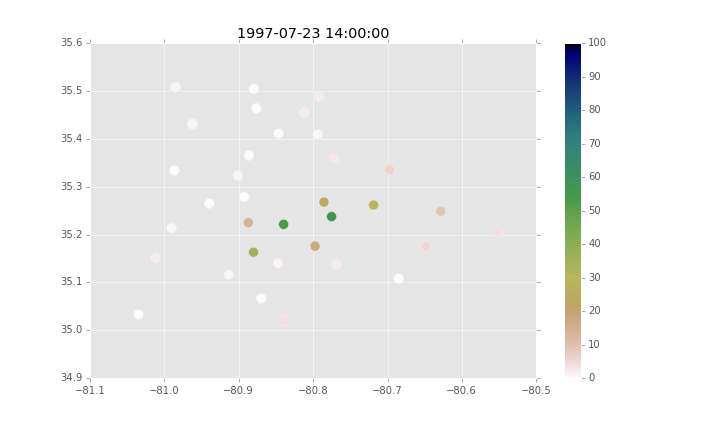
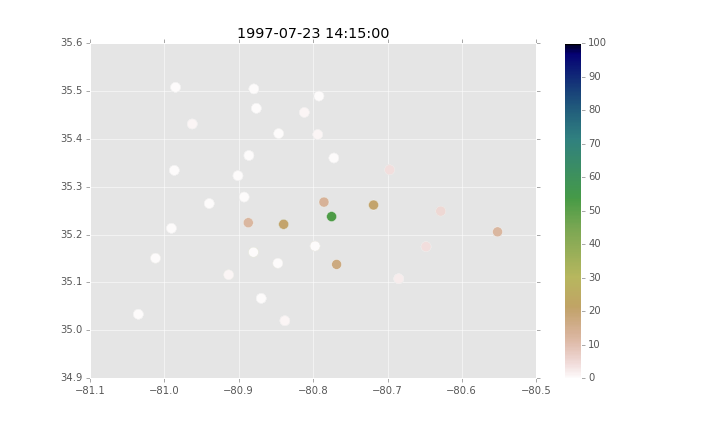
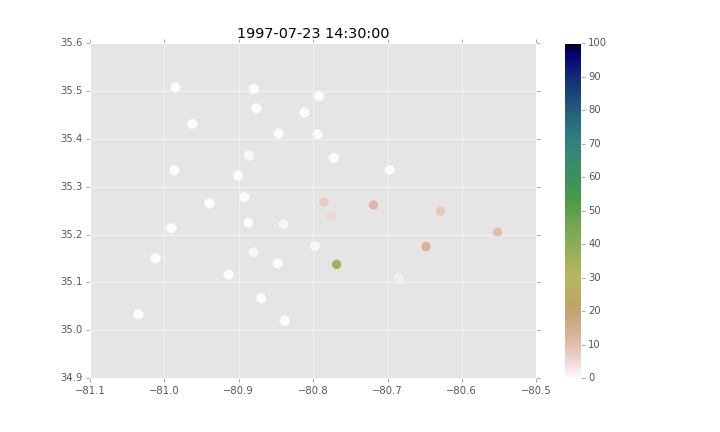
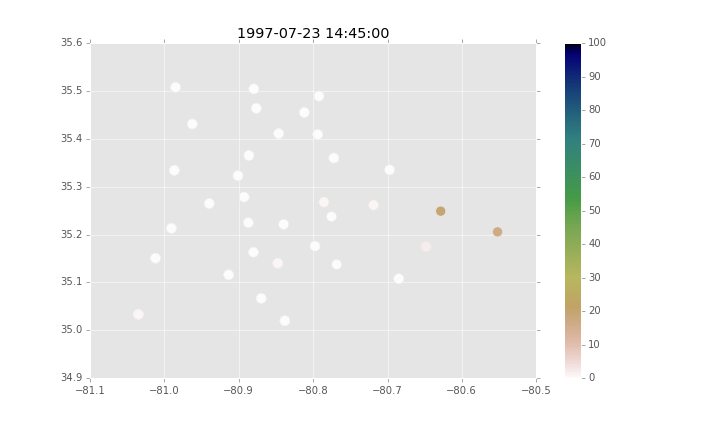
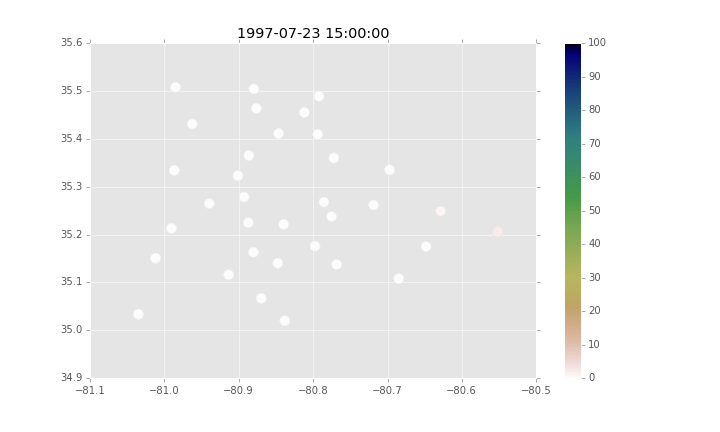

In [28]:
storm.movie()

That is hard to look at, so let's try some Kriging

In [29]:
storm.detrend()
res = storm.res

[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]



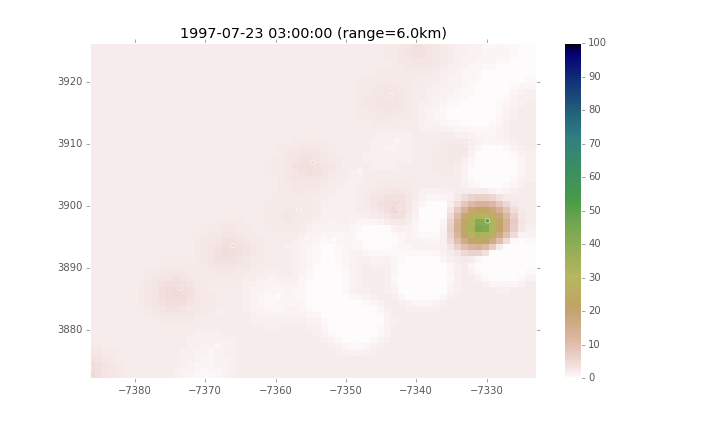
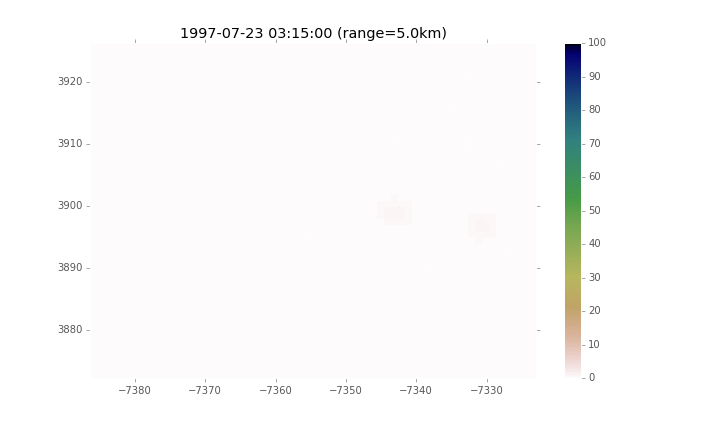
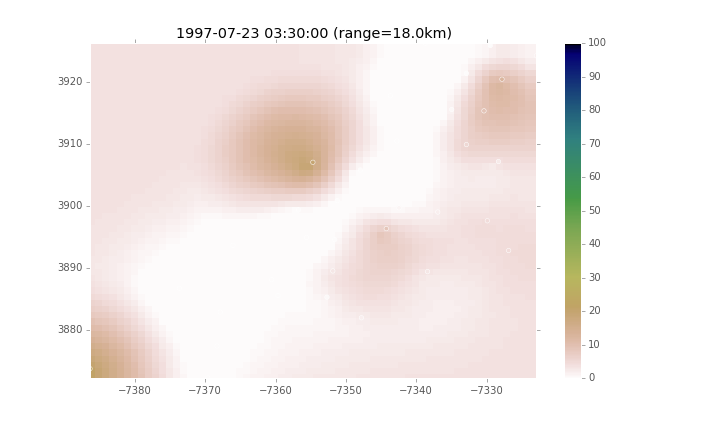
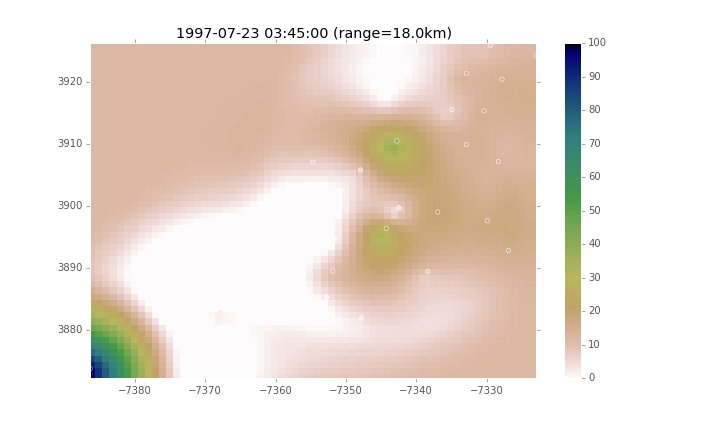
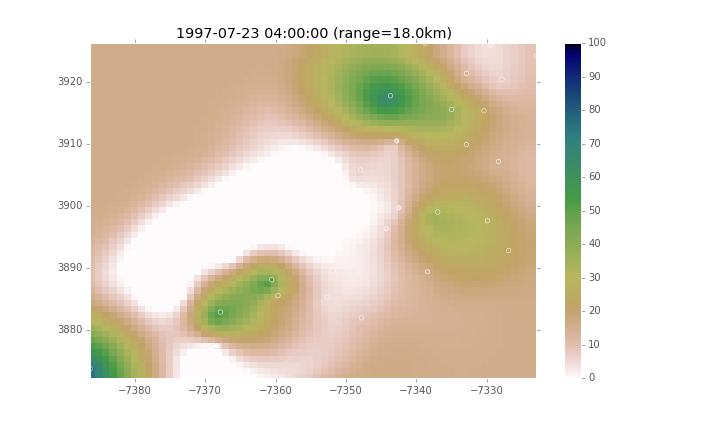
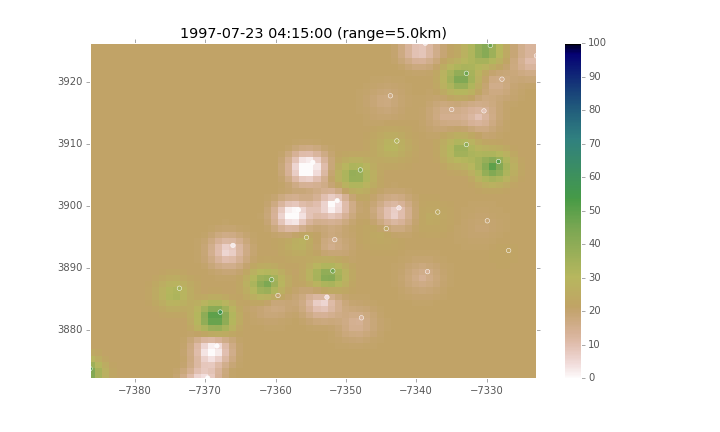
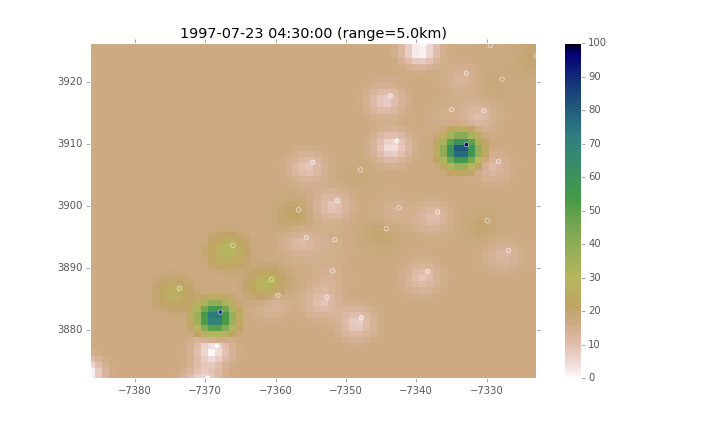
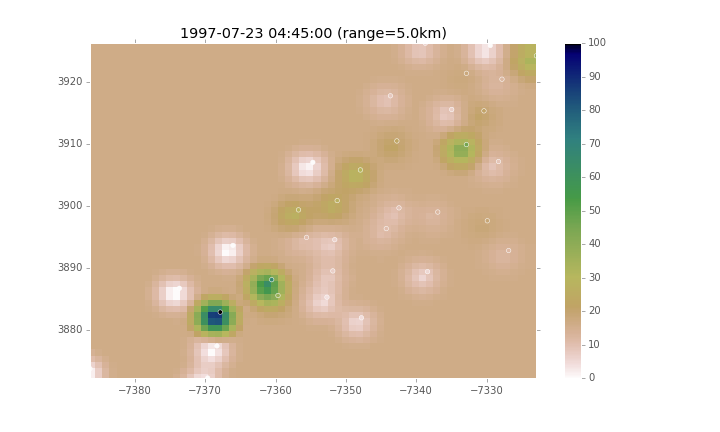
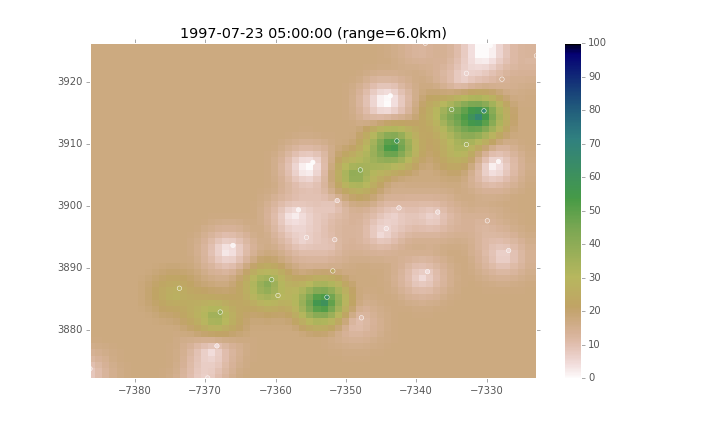
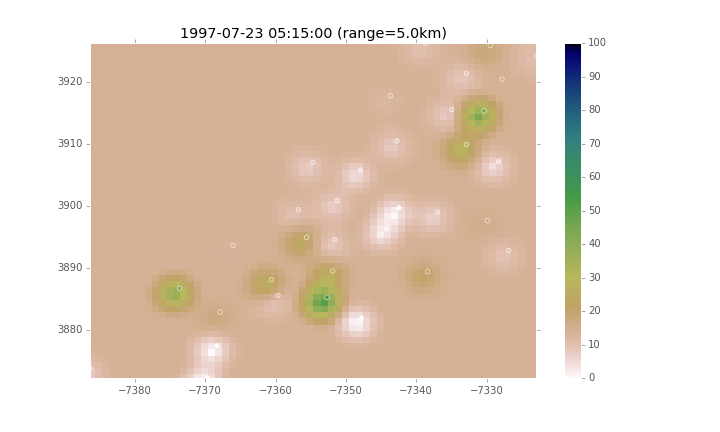
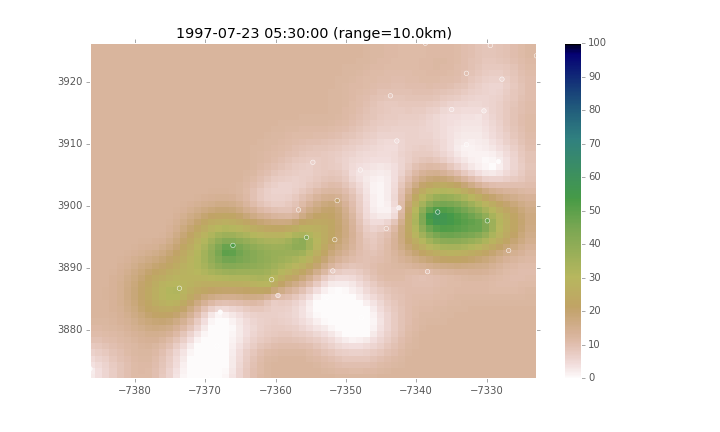
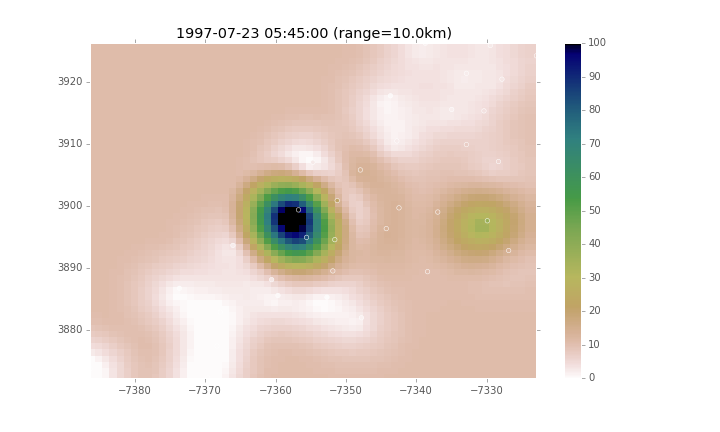
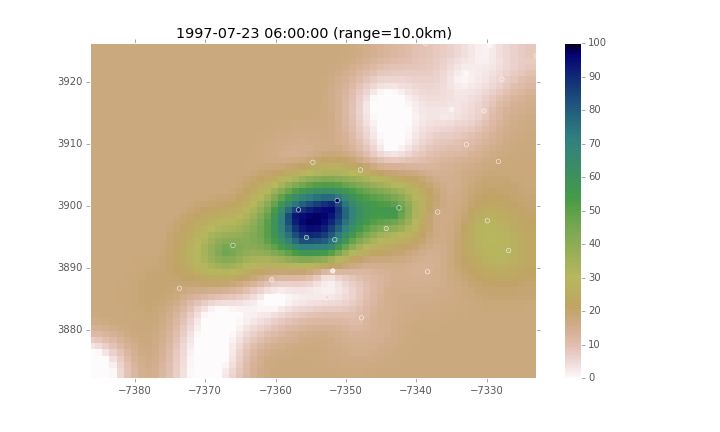
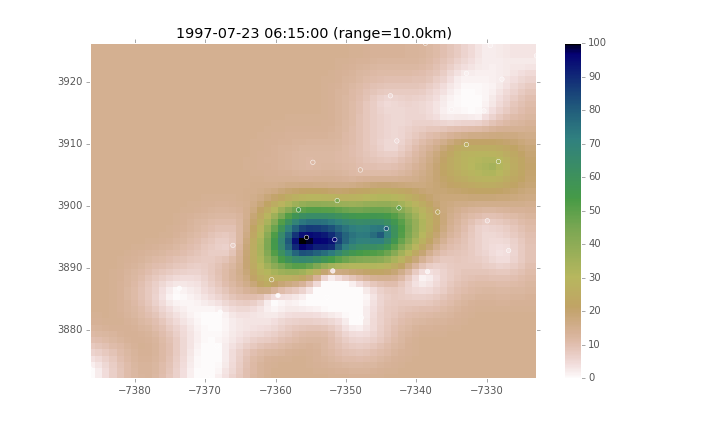
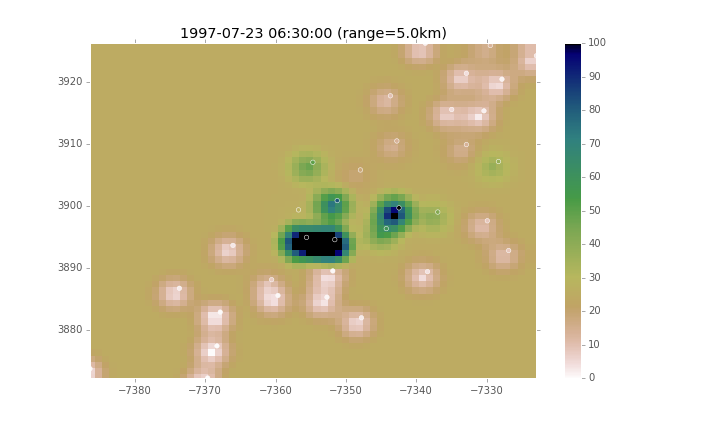
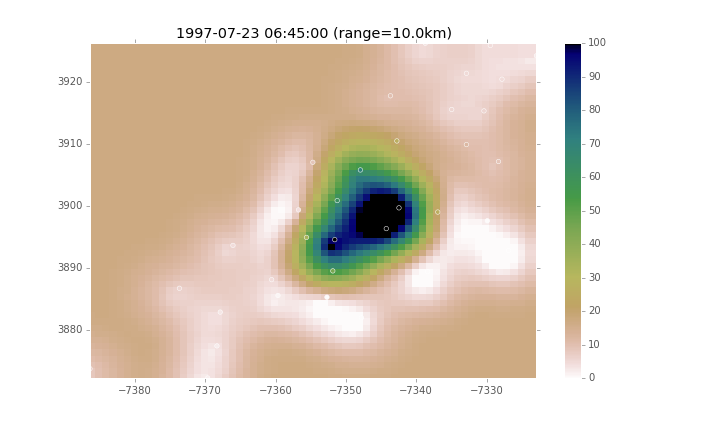
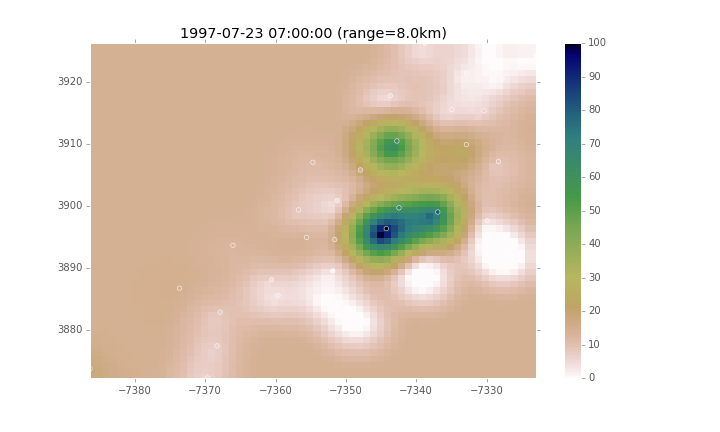
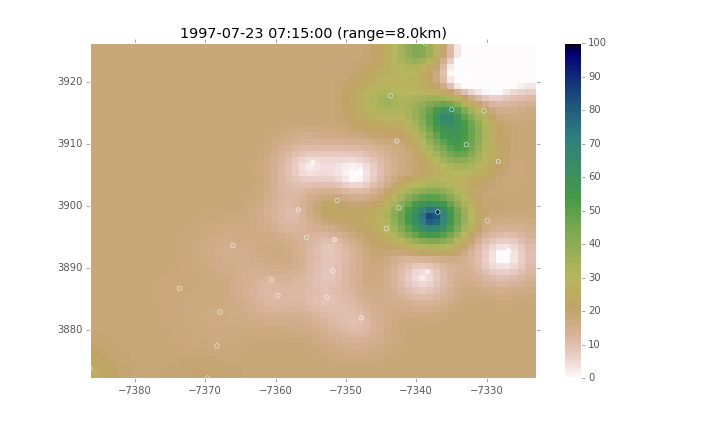
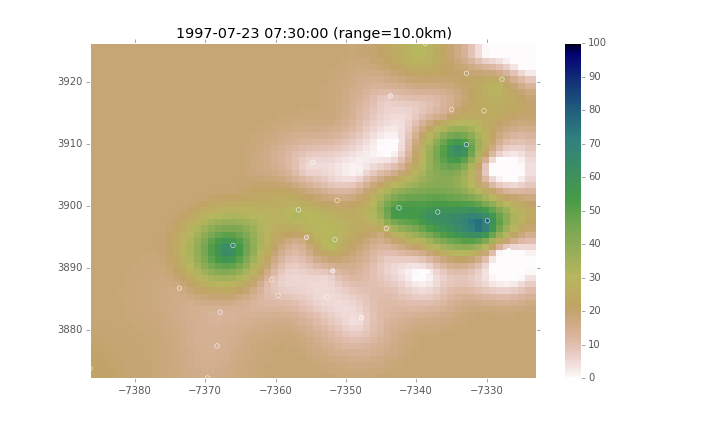
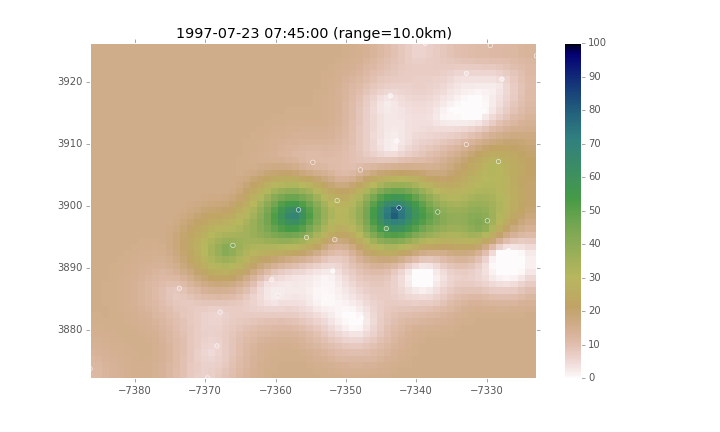
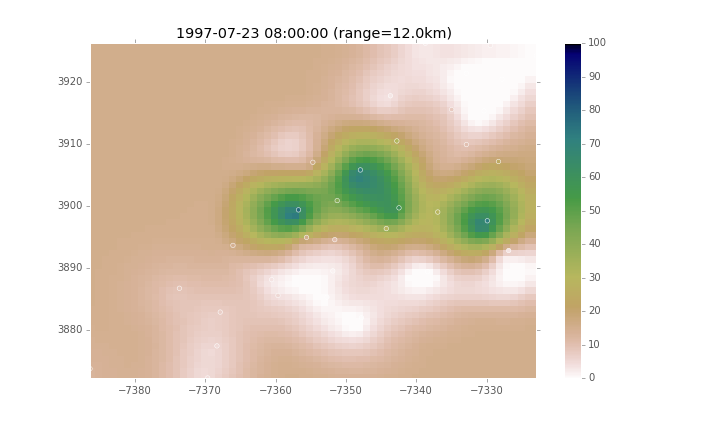
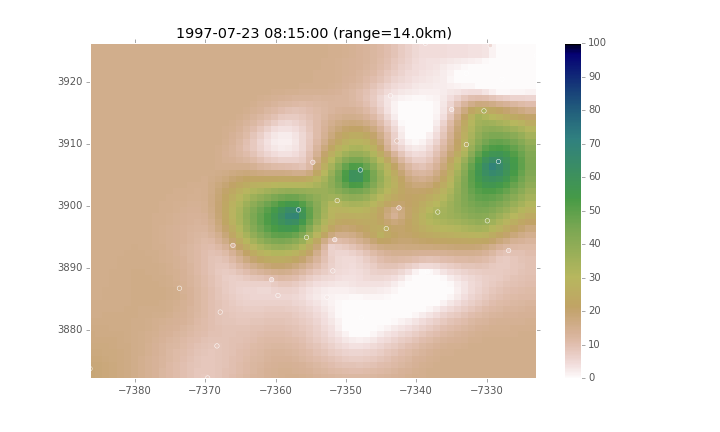
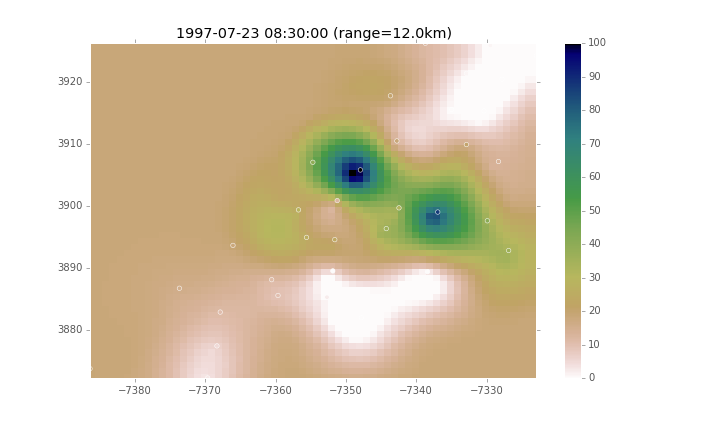
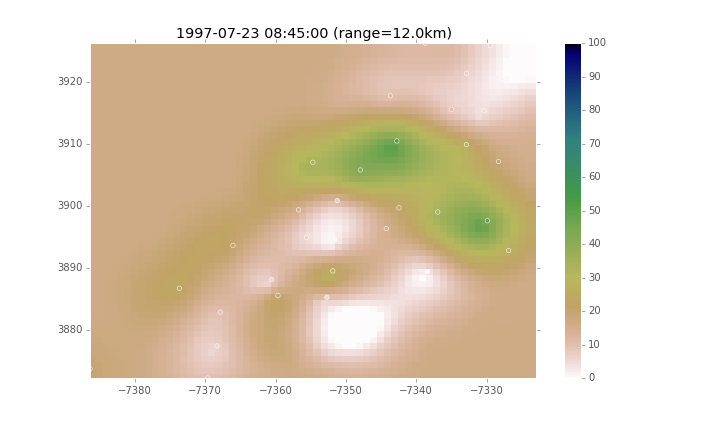
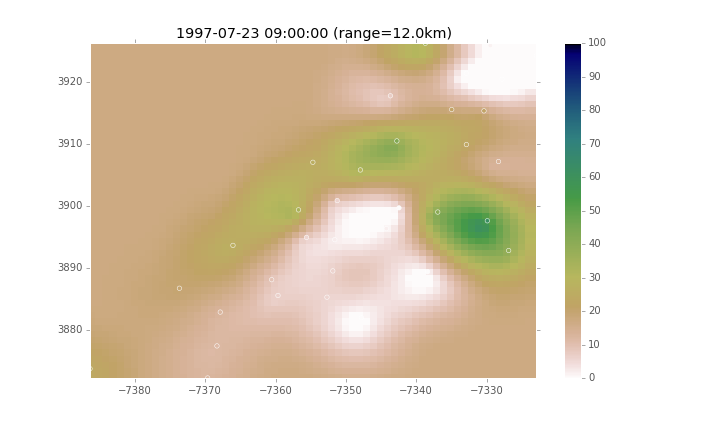
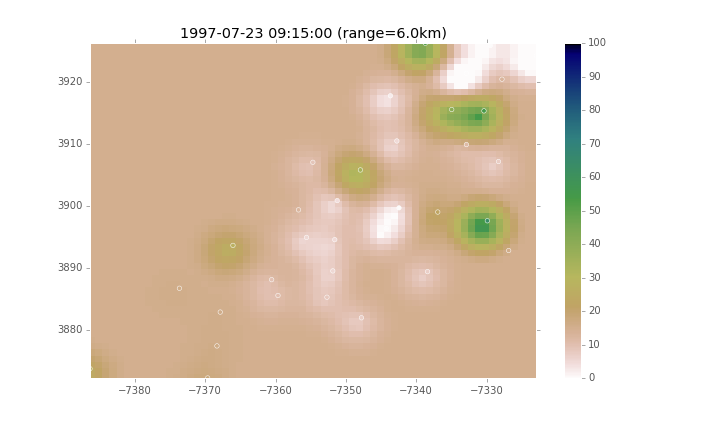
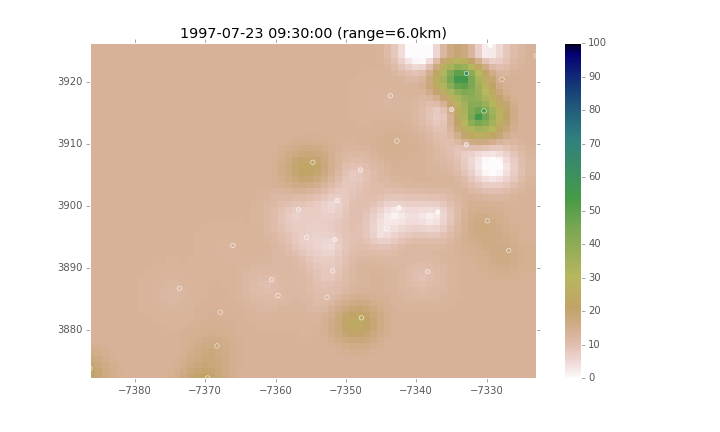
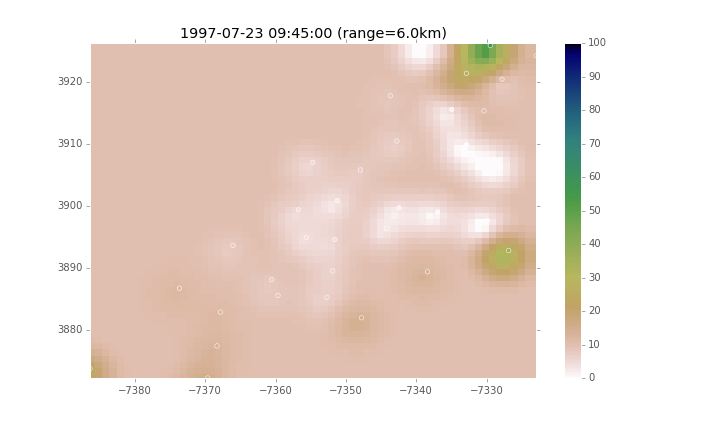
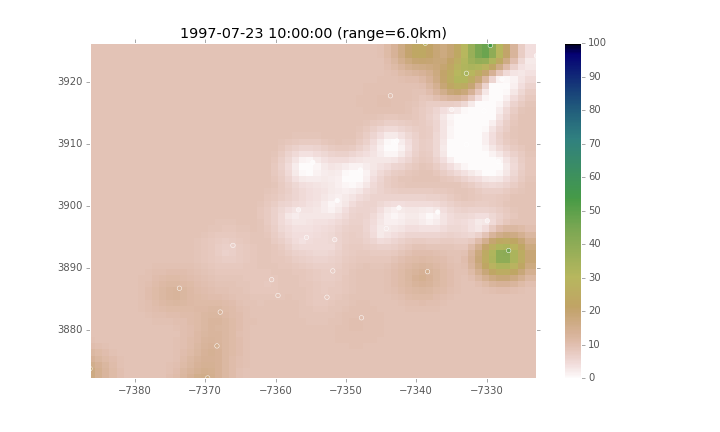
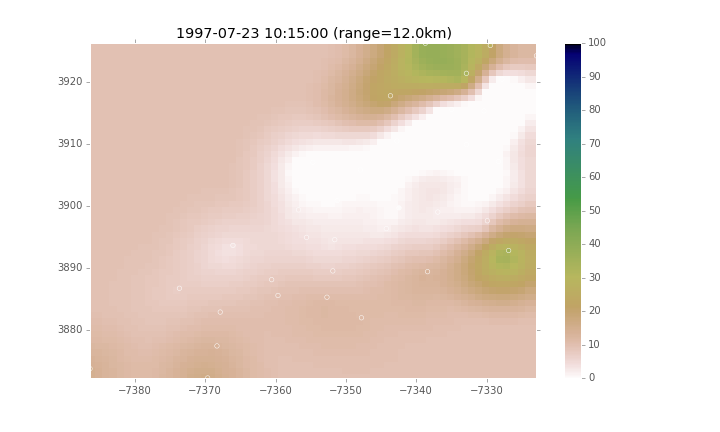
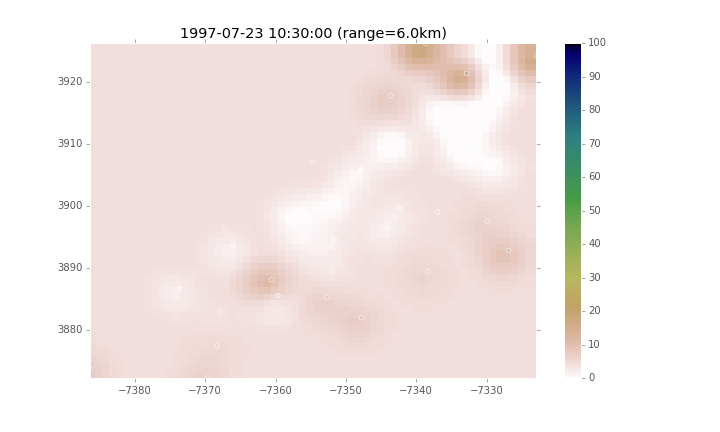
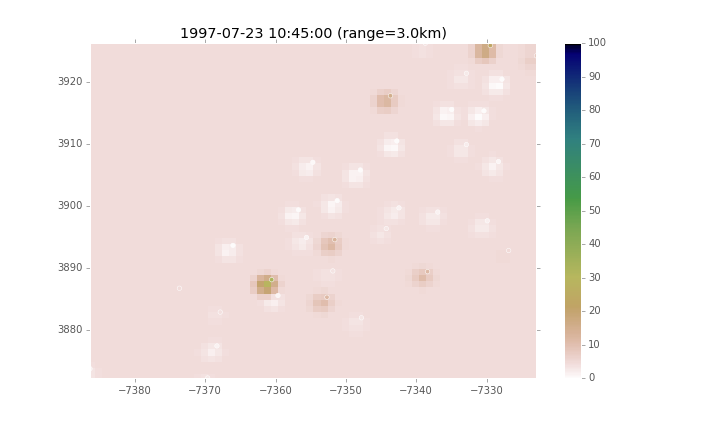
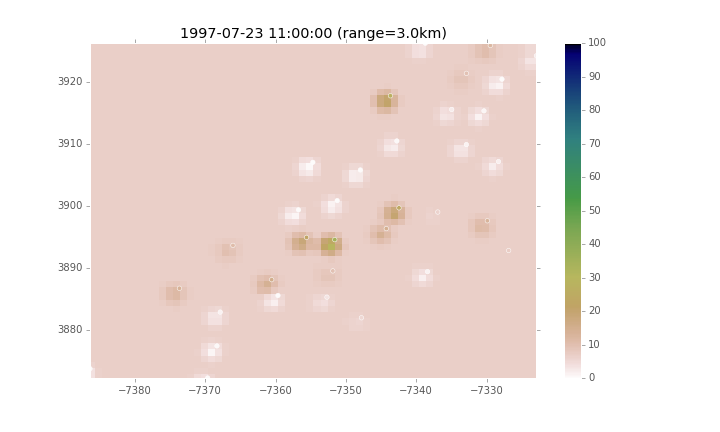
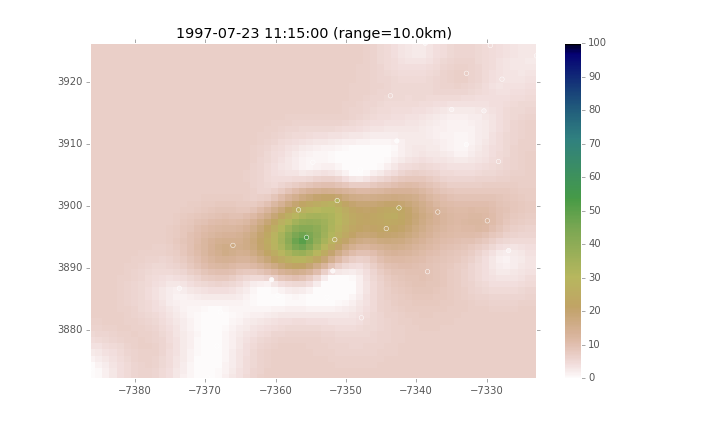
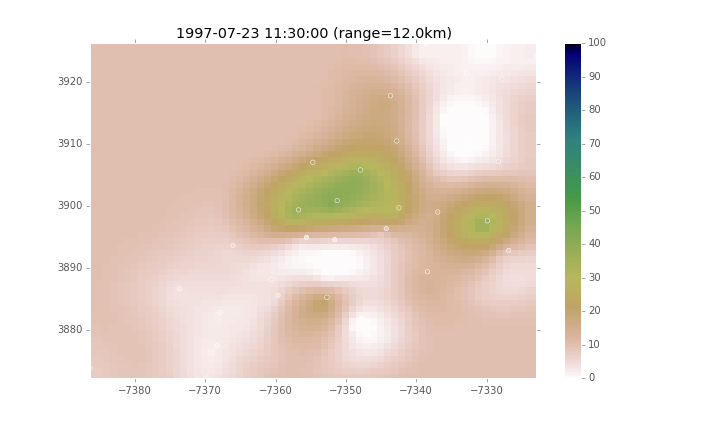
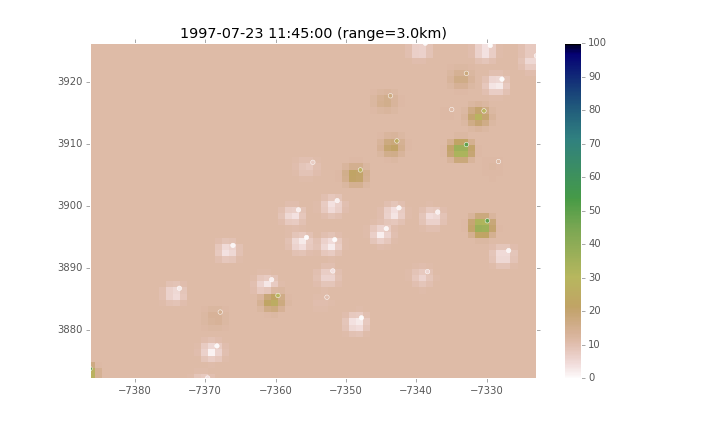
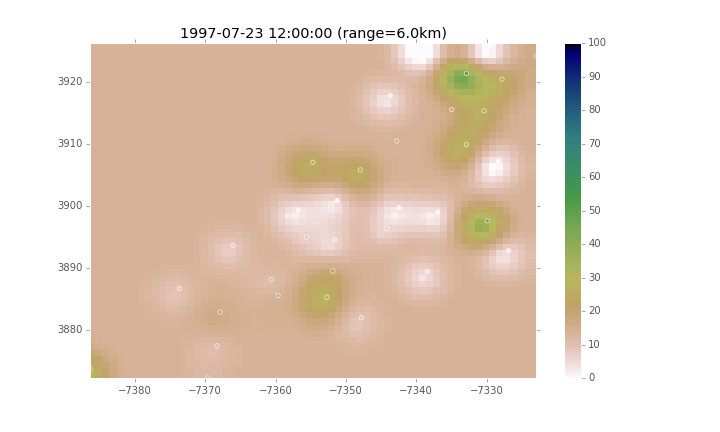
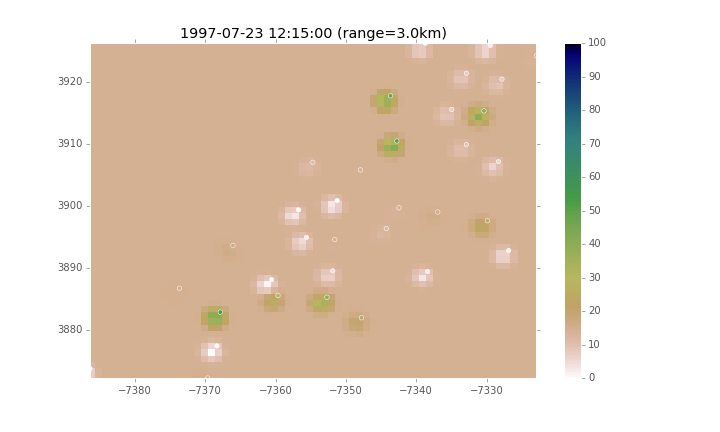
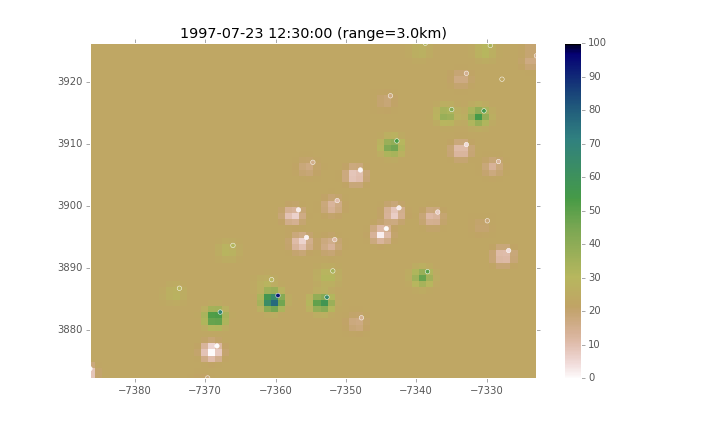
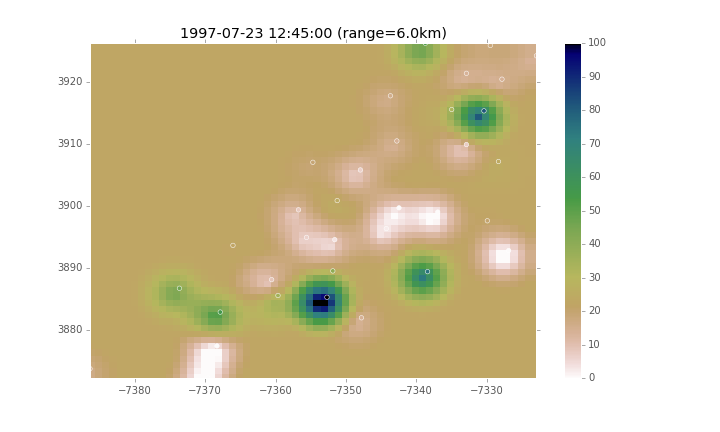
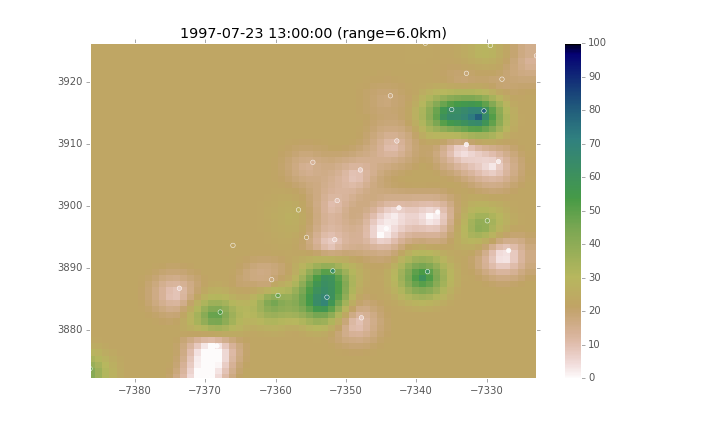
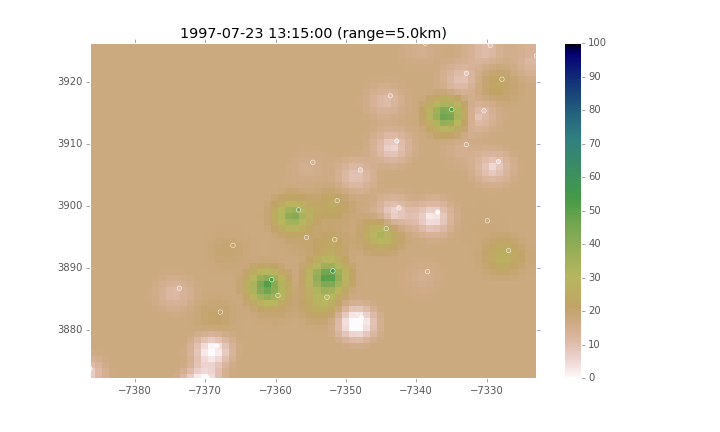
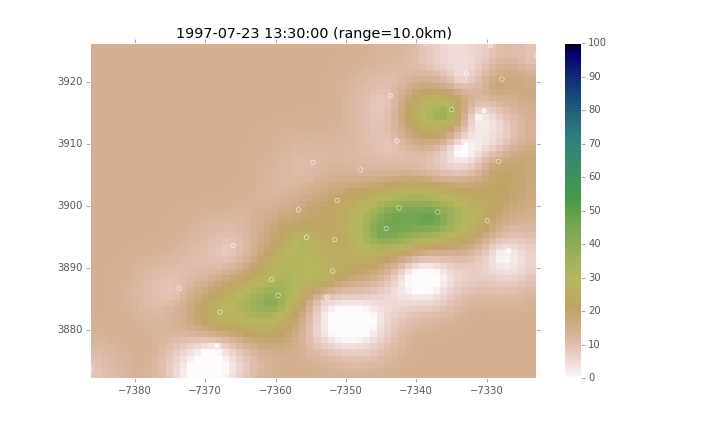
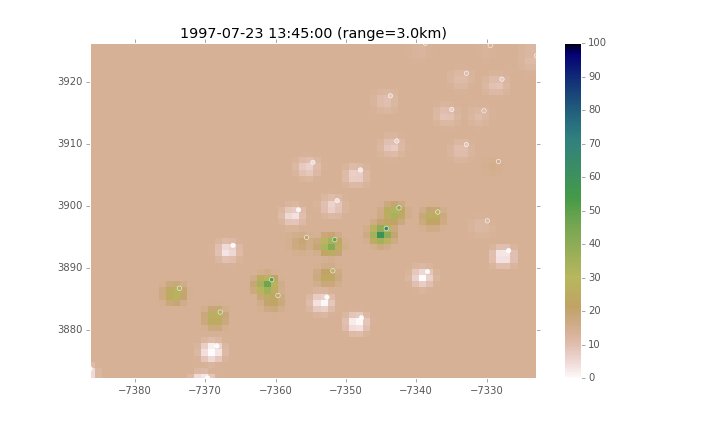
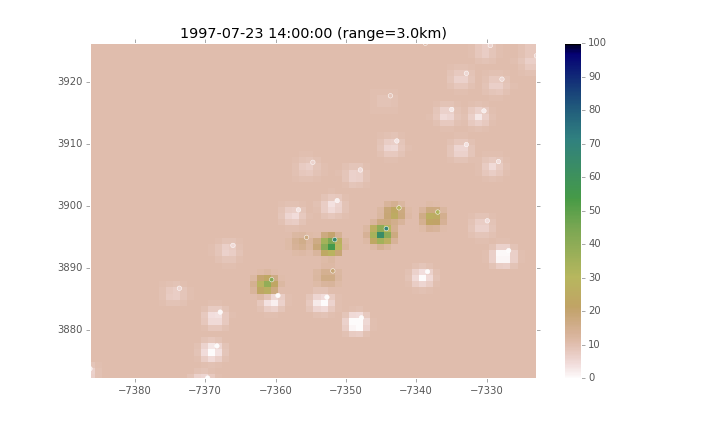
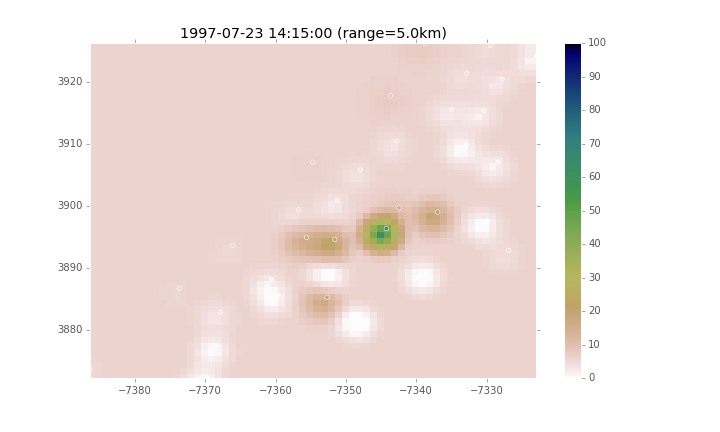
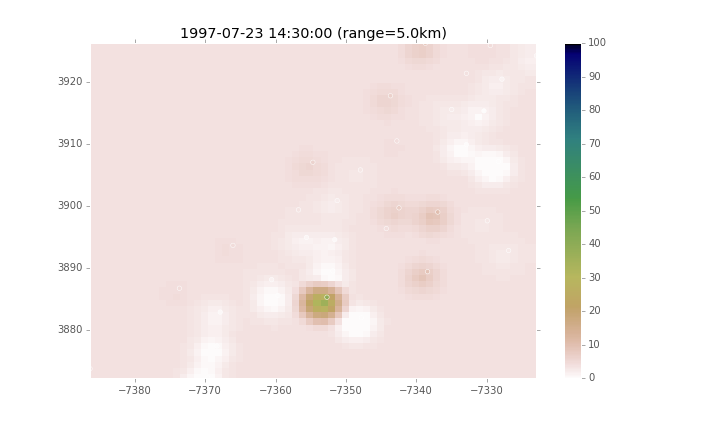
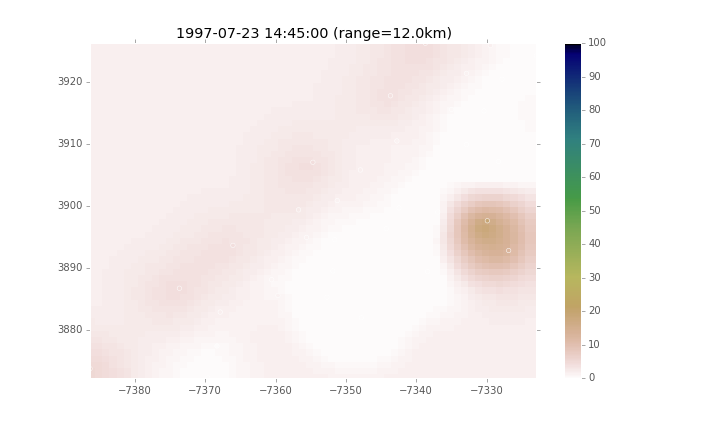
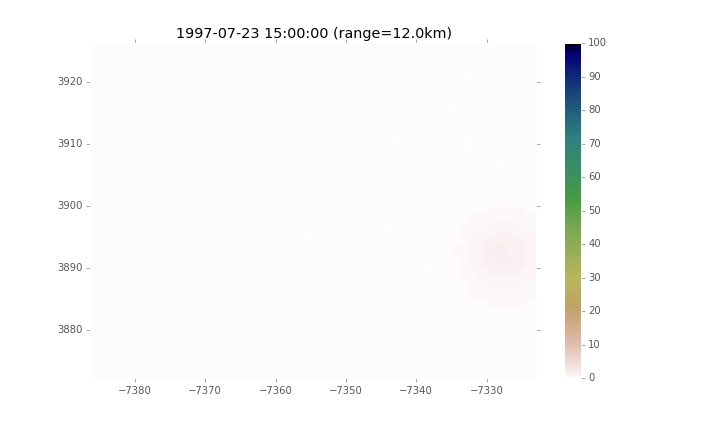

In [30]:
fig, ax = plt.subplots(1,1,figsize= (10,6))
sc = Event(res).krige(5, animated=True, ax=ax, vmin=0, vmax=100)
fig.colorbar(sc)

def animate(i):
    global res
    Event(res).krige(i+5, animated=True, ax=ax, vmin=0, vmax=80)
animation.FuncAnimation(fig, animate, frames=len(res.columns[5:]), interval=300, blit=True)

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')